In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from utils.helpers import read_file, save_file
from utils.preprocessing import get_unique_values, fix_logically_missing_values, clean_missing_values, look_for_outliers, handle_outliers_iqr
from utils.encoding import label_encode_categorical_features
from utils.skewness import treat_skewness
from utils.scaling import scale_features

In [416]:
df = read_file('data/train.csv')

In [417]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [418]:
get_unique_values(df)

Id: [   1    2    3 ... 1458 1459 1460]

MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']

LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

LotArea: [ 8450  9600 11250 ... 17217 13175  9717]

Street: ['Pave' 'Grvl']

Alley: [nan 'Grvl' 'Pave']

LotShape: ['Reg' 'IR1' 'IR2' 'IR3']

LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities: ['AllPub' 'NoSeWa']

LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR

In [419]:
pd.set_option('display.max_rows', None)  #this line to show all of the records
df_dtypes = pd.DataFrame({"Feature": df.columns, "Data Type": df.dtypes})
print(df_dtypes)
pd.reset_option('display.max_rows')

                     Feature Data Type
Id                        Id     int64
MSSubClass        MSSubClass     int64
MSZoning            MSZoning    object
LotFrontage      LotFrontage   float64
LotArea              LotArea     int64
Street                Street    object
Alley                  Alley    object
LotShape            LotShape    object
LandContour      LandContour    object
Utilities          Utilities    object
LotConfig          LotConfig    object
LandSlope          LandSlope    object
Neighborhood    Neighborhood    object
Condition1        Condition1    object
Condition2        Condition2    object
BldgType            BldgType    object
HouseStyle        HouseStyle    object
OverallQual      OverallQual     int64
OverallCond      OverallCond     int64
YearBuilt          YearBuilt     int64
YearRemodAdd    YearRemodAdd     int64
RoofStyle          RoofStyle    object
RoofMatl            RoofMatl    object
Exterior1st      Exterior1st    object
Exterior2nd      Exterior

In [420]:
#Checking the percentage of the missing data
pd.set_option('display.max_rows', None)
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns, 'Missing Percentage': missing_percentage})
print(missing_df)

                     Feature  Missing Percentage
Id                        Id            0.000000
MSSubClass        MSSubClass            0.000000
MSZoning            MSZoning            0.000000
LotFrontage      LotFrontage           17.739726
LotArea              LotArea            0.000000
Street                Street            0.000000
Alley                  Alley           93.767123
LotShape            LotShape            0.000000
LandContour      LandContour            0.000000
Utilities          Utilities            0.000000
LotConfig          LotConfig            0.000000
LandSlope          LandSlope            0.000000
Neighborhood    Neighborhood            0.000000
Condition1        Condition1            0.000000
Condition2        Condition2            0.000000
BldgType            BldgType            0.000000
HouseStyle        HouseStyle            0.000000
OverallQual      OverallQual            0.000000
OverallCond      OverallCond            0.000000
YearBuilt          Y

In [421]:
df = fix_logically_missing_values(df)

In [422]:
df = clean_missing_values(df)

Filling missing values in 'LotFrontage' with median: 69.0


In [423]:
get_unique_values(df)

Id: [   1    2    3 ... 1458 1459 1460]

MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']

LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  69.  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

LotArea: [ 8450  9600 11250 ... 17217 13175  9717]

Street: ['Pave' 'Grvl']

Alley: ['Not Available' 'Grvl' 'Pave']

LotShape: ['Reg' 'IR1' 'IR2' 'IR3']

LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities: ['AllPub' 'NoSeWa']

LotConfig: ['Inside' 'FR2' 'Corner' 'CulDS

In [424]:
df.duplicated().sum()

np.int64(0)

In [425]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [426]:
save_file(df, "data/preprocessed_data/preprocessed_train.csv")

In [427]:
df = read_file('data/preprocessed_data/preprocessed_train.csv')

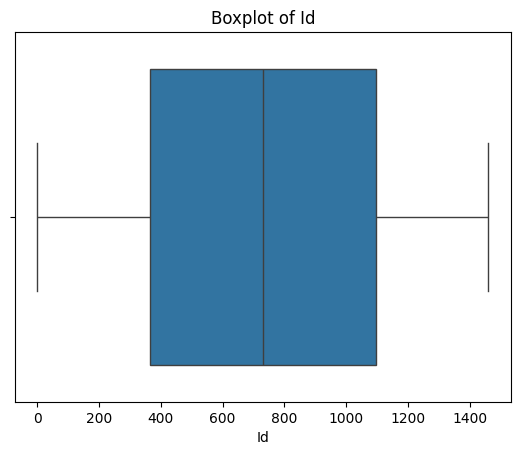

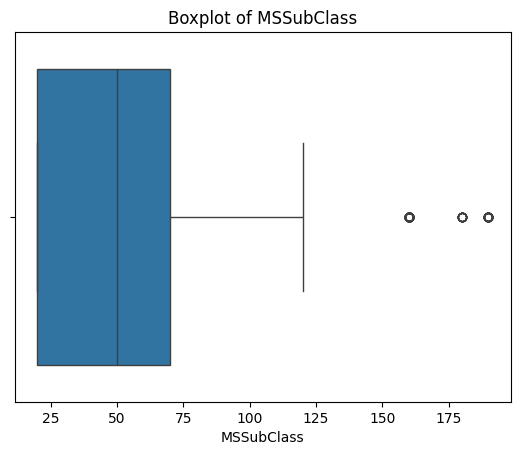

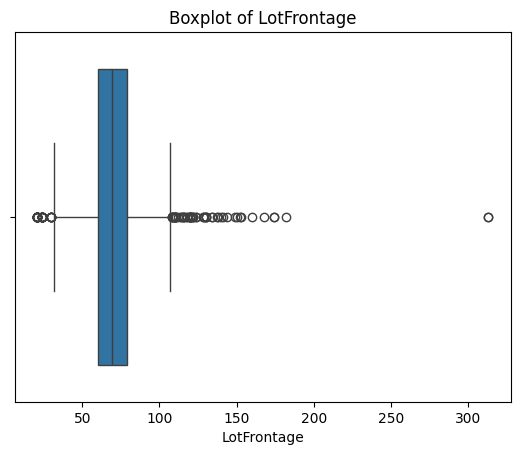

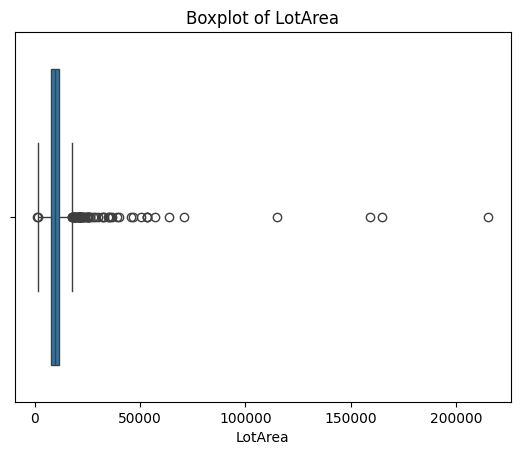

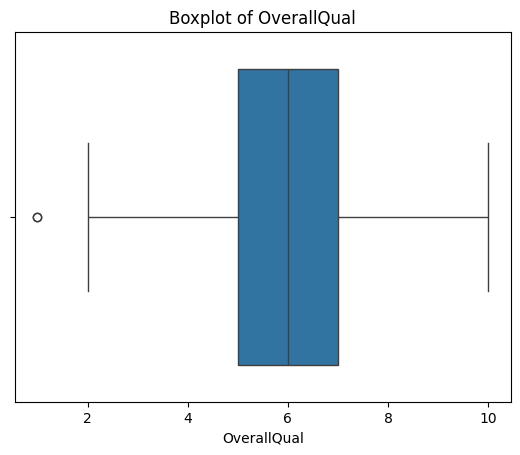

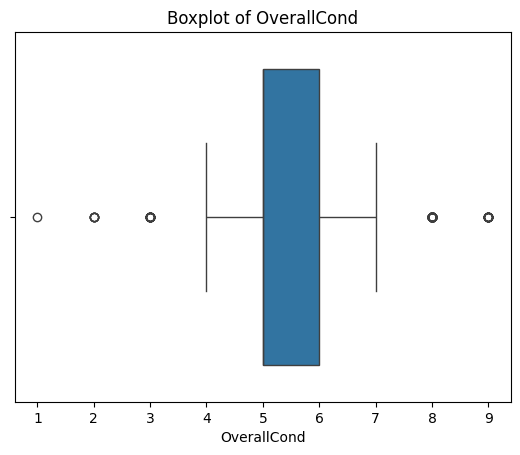

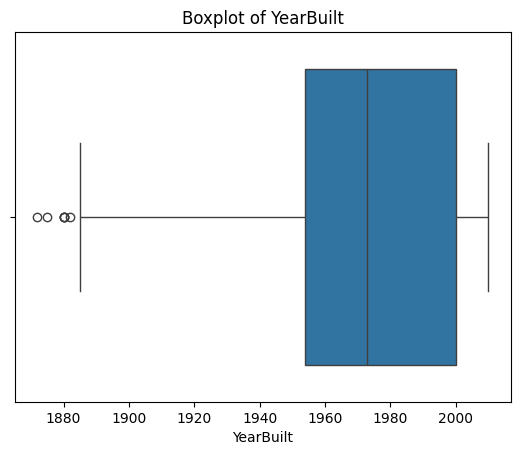

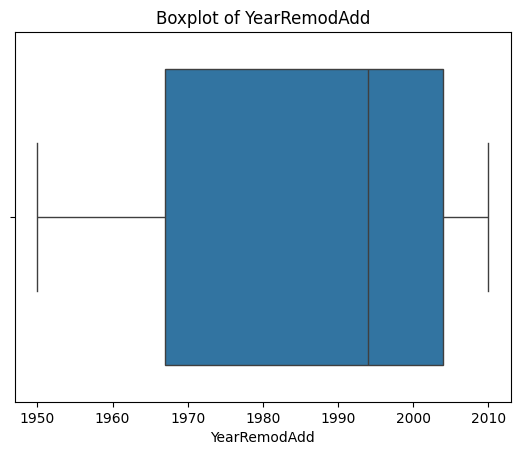

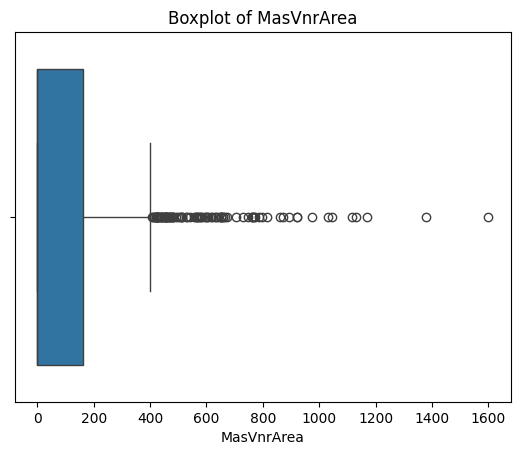

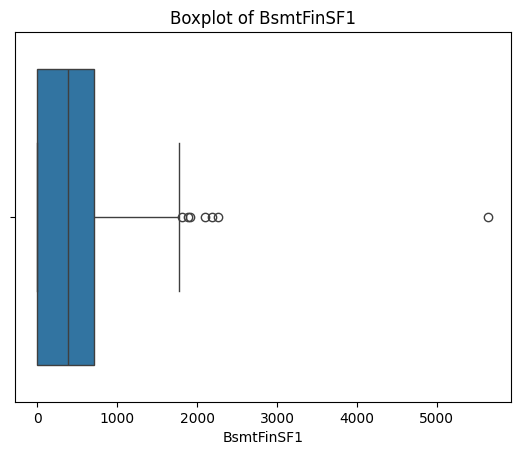

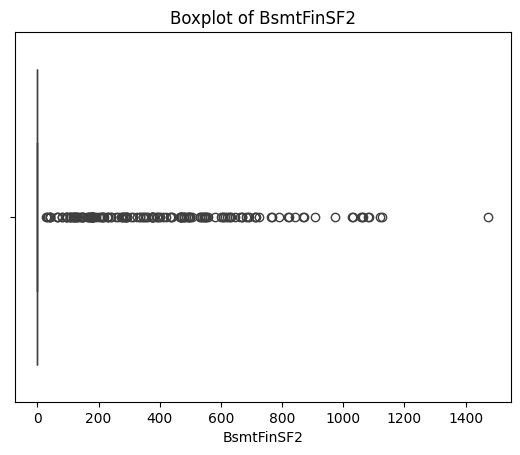

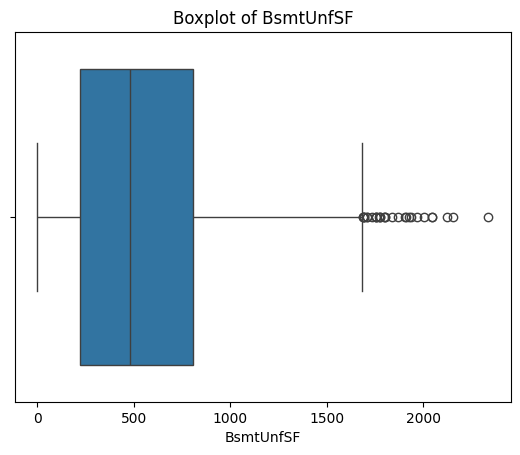

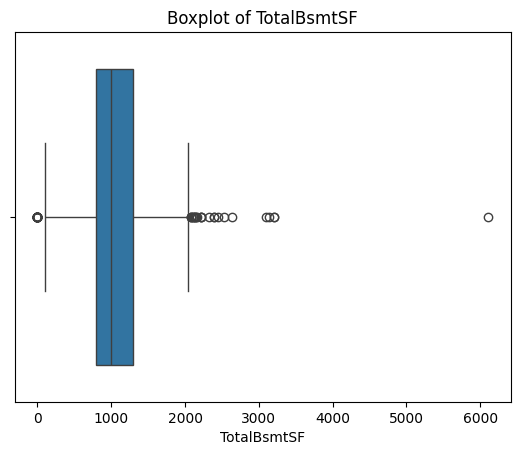

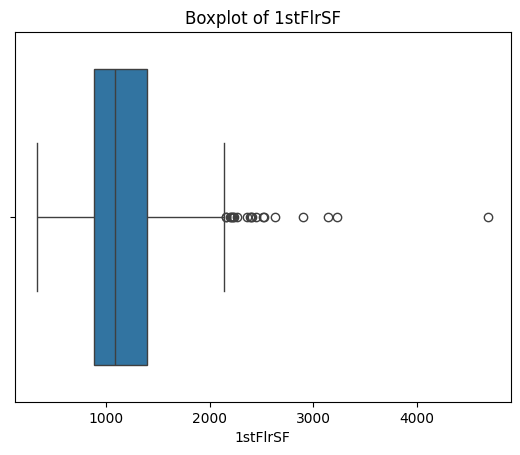

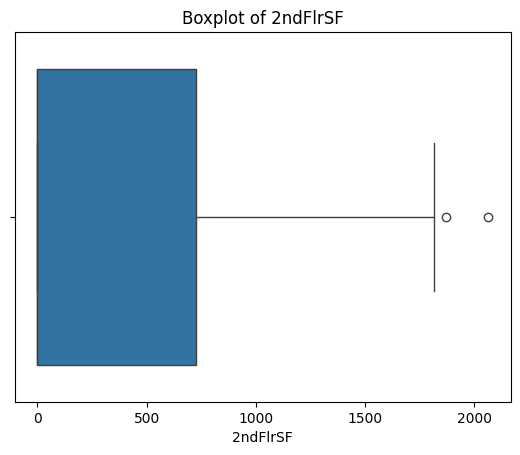

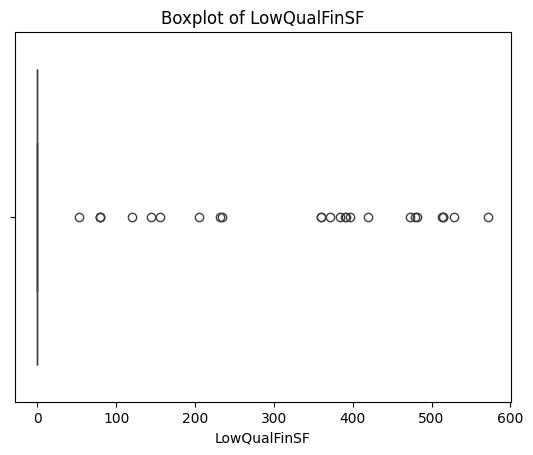

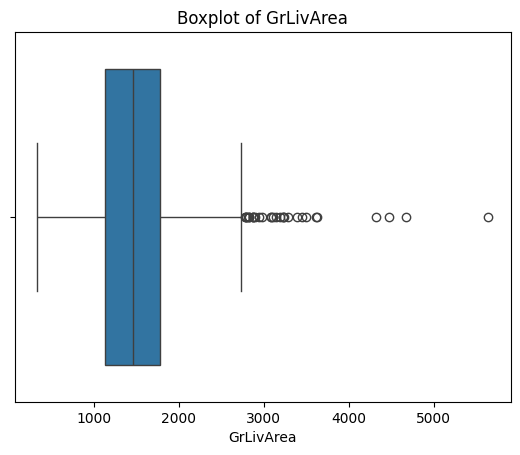

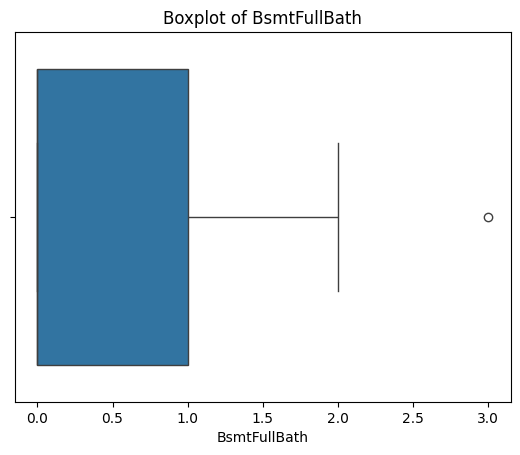

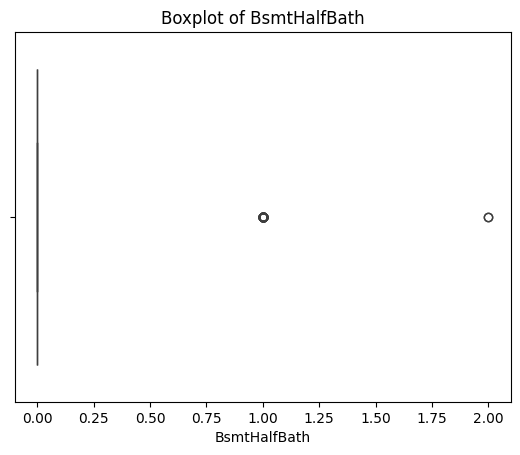

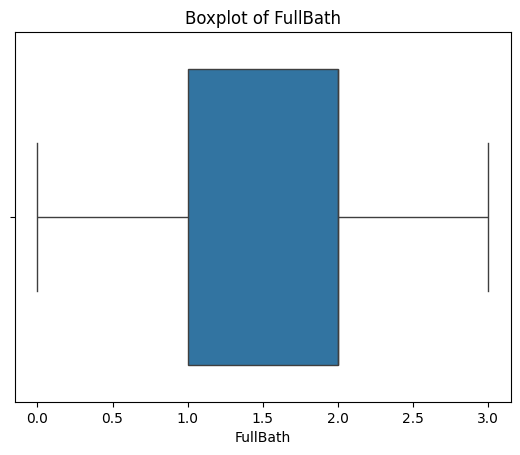

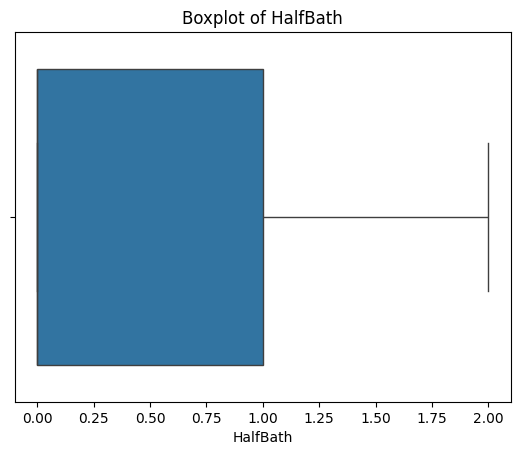

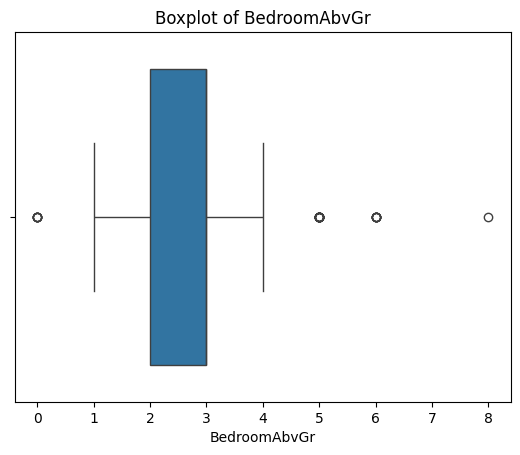

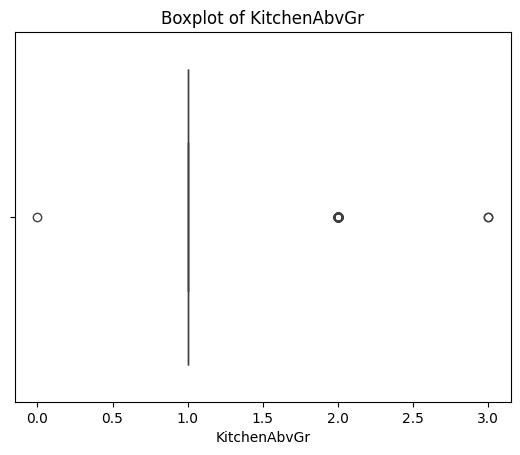

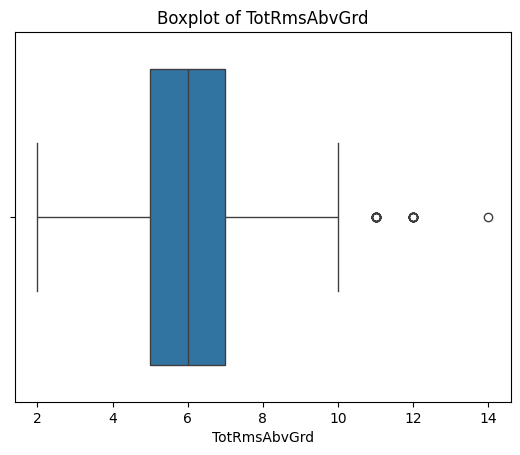

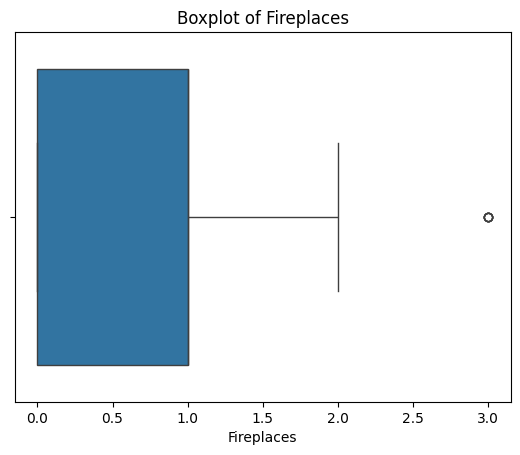

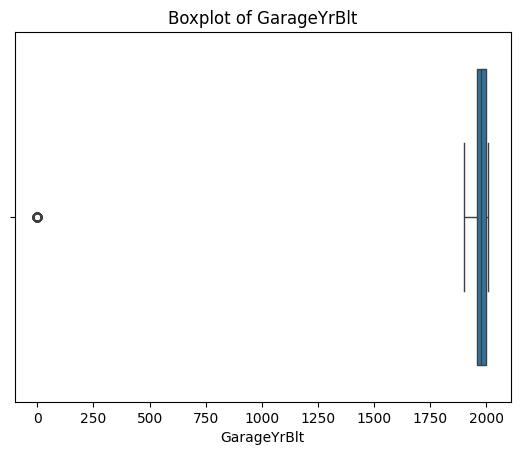

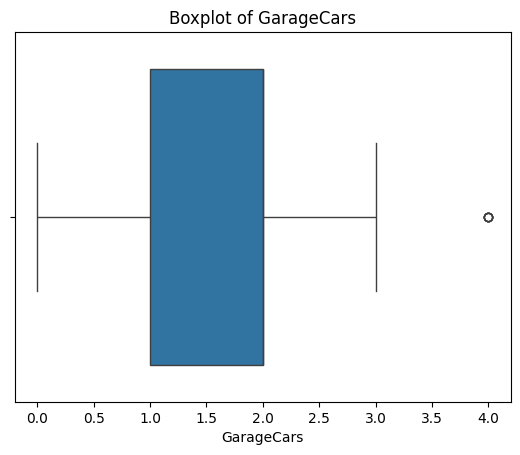

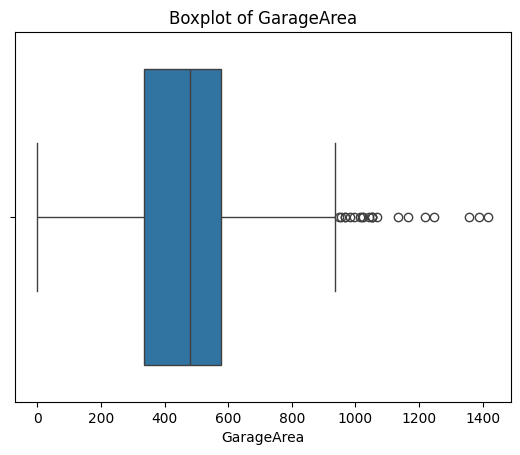

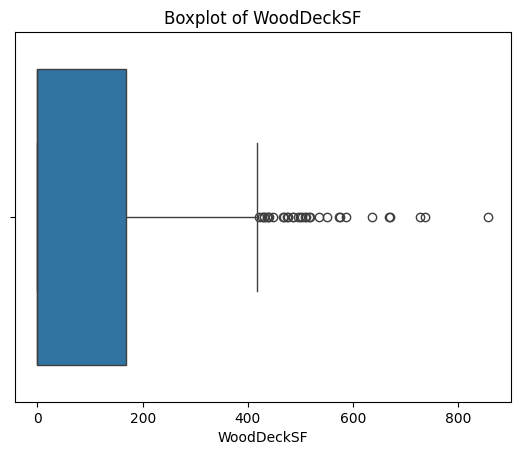

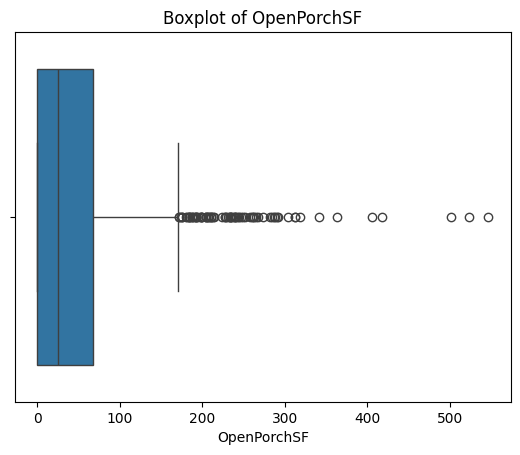

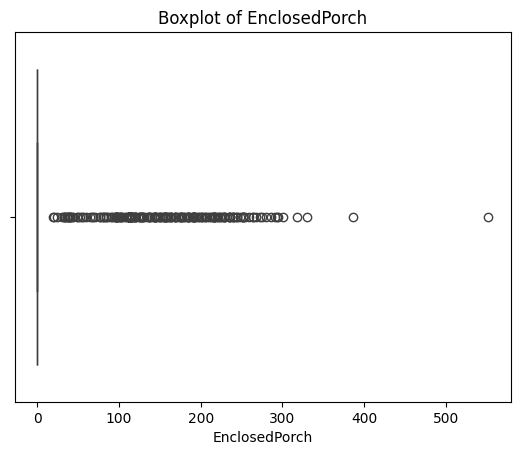

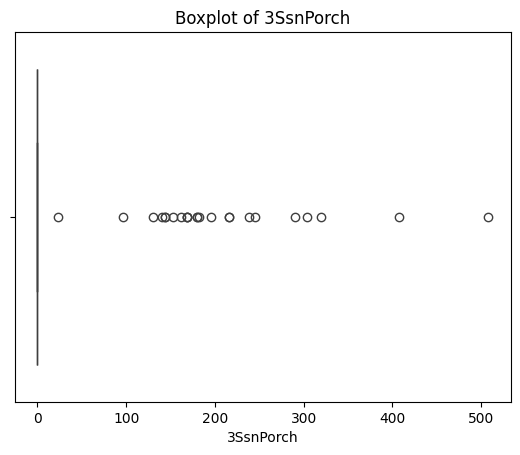

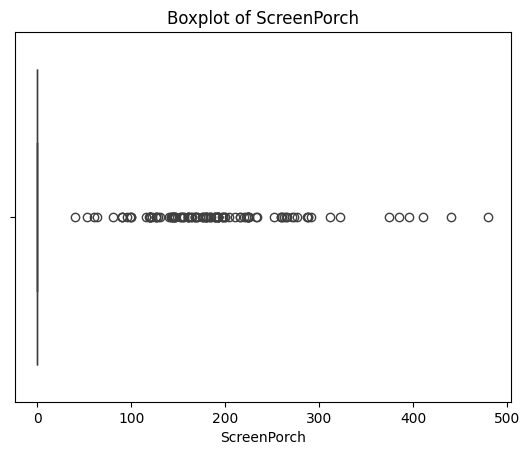

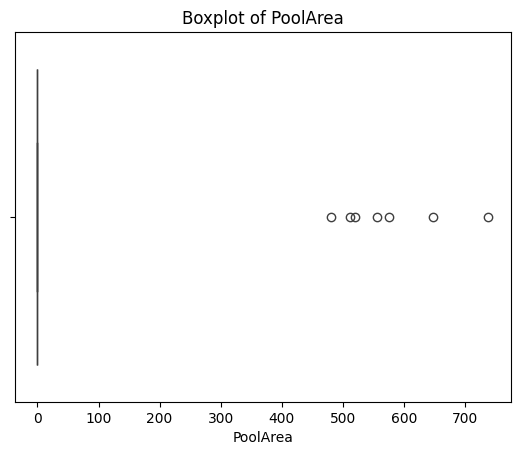

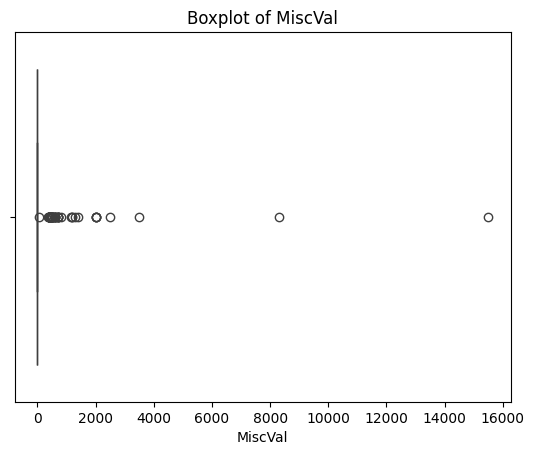

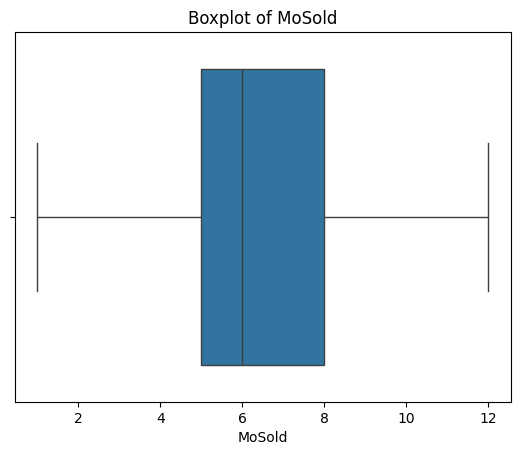

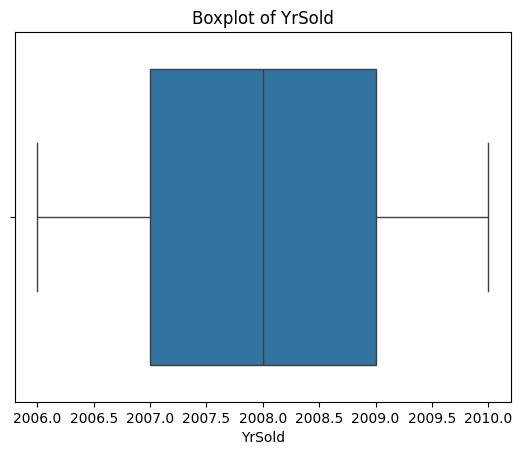

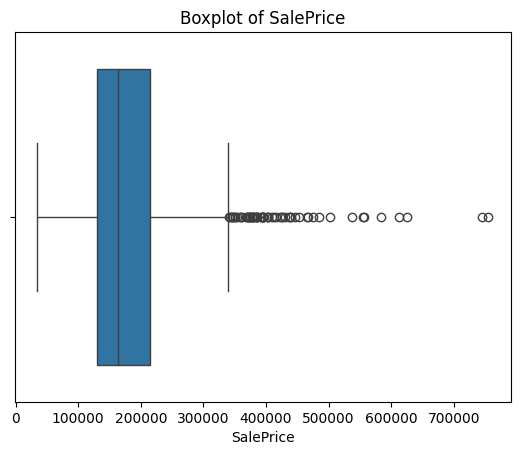

In [428]:
look_for_outliers(df)

In [429]:
# List of numerical features (excluding the target variable 'SalePrice')
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# numerical_features.remove('SalePrice')

# Apply the function to handle outliers
new_df = handle_outliers_iqr(df, numerical_features)

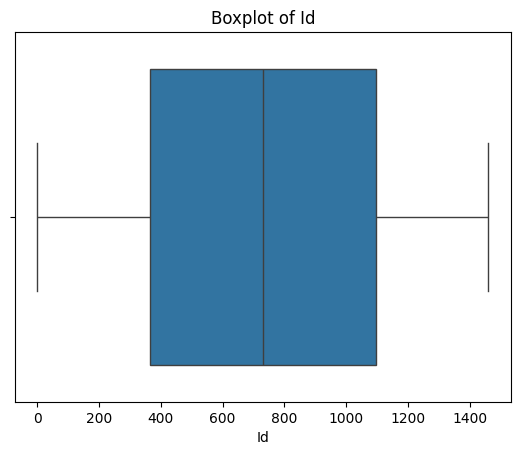

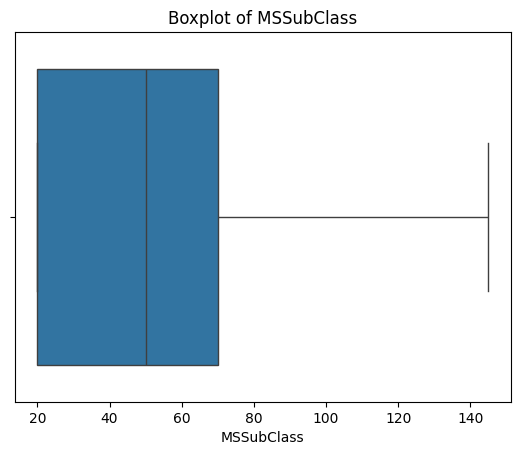

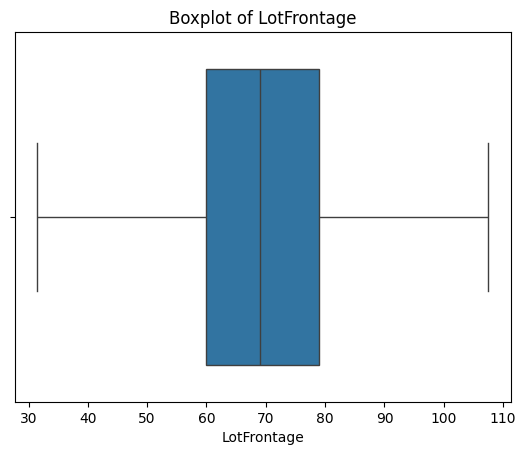

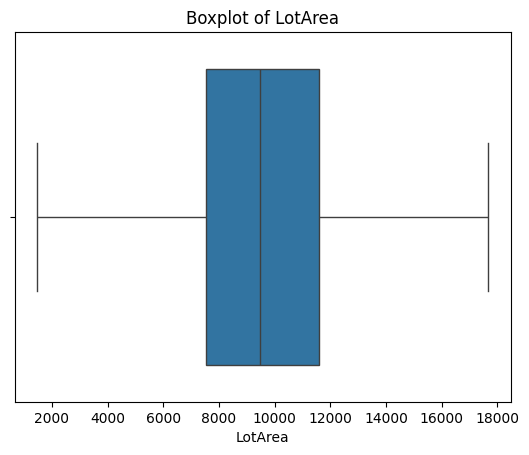

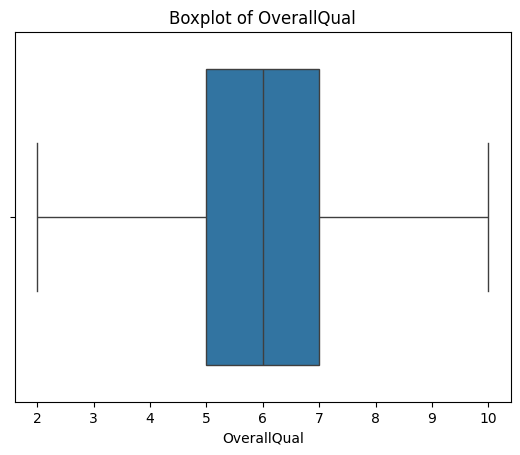

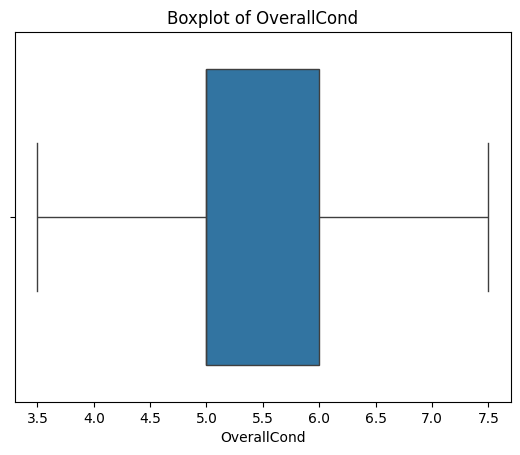

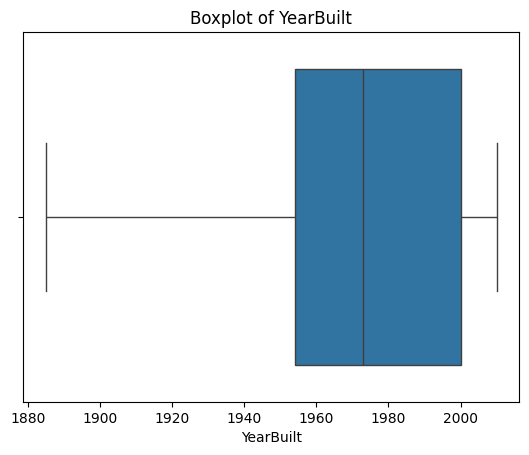

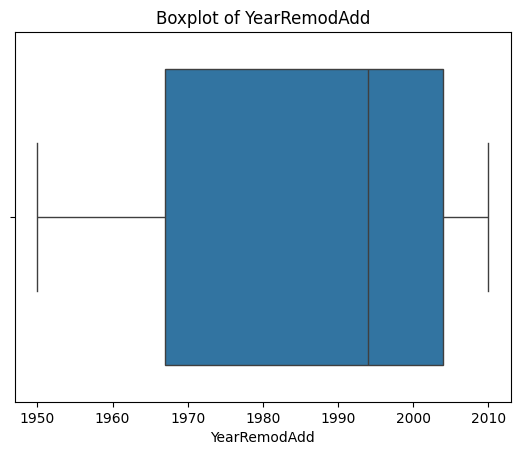

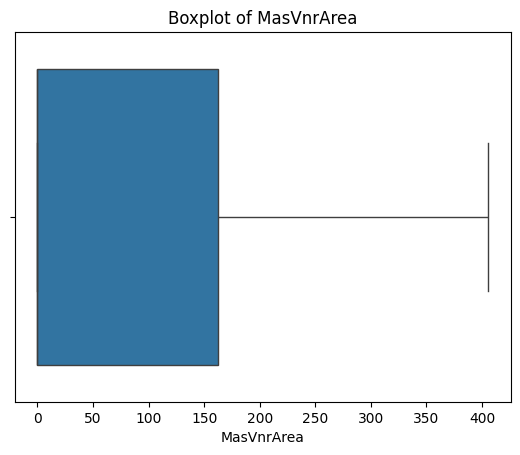

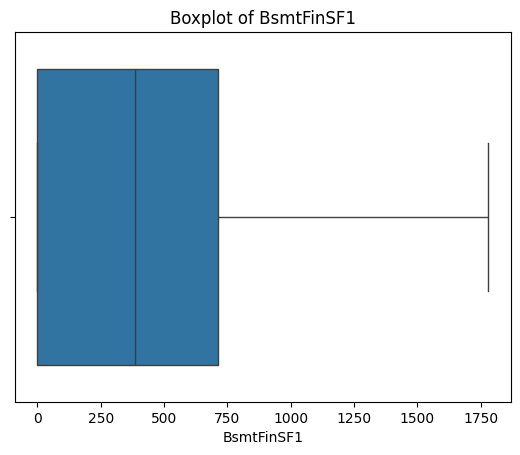

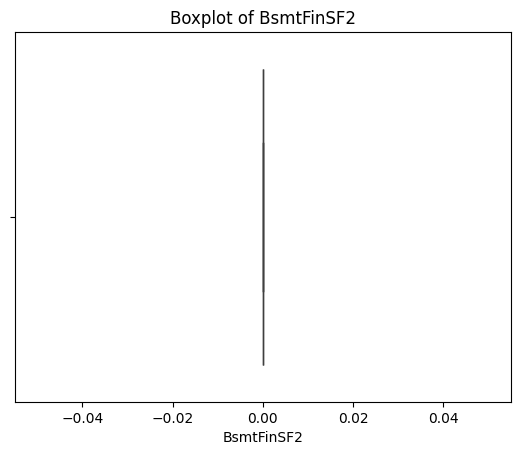

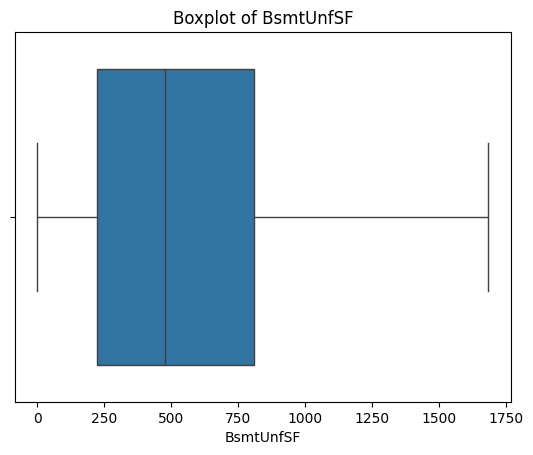

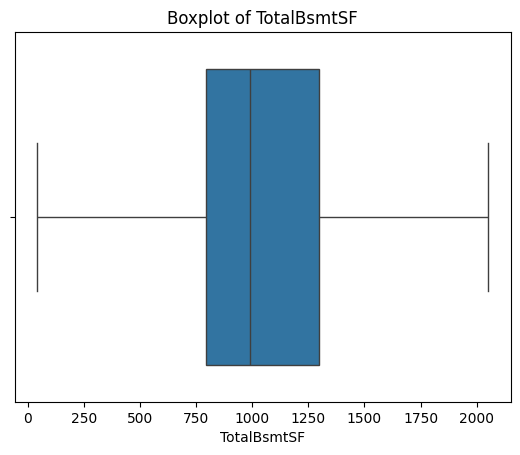

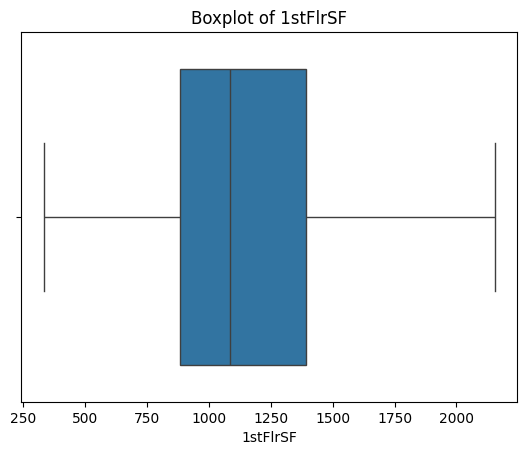

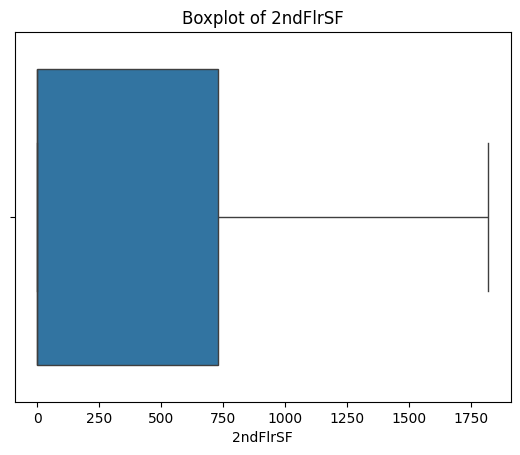

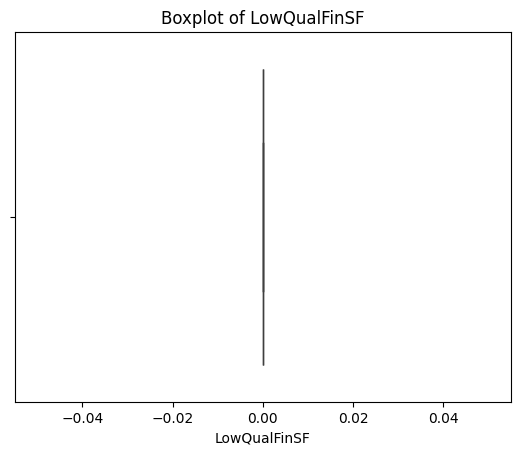

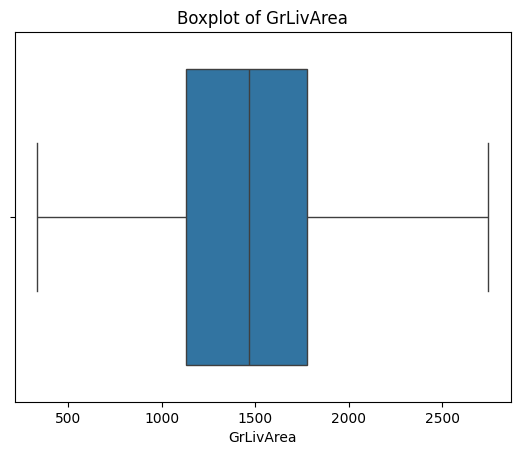

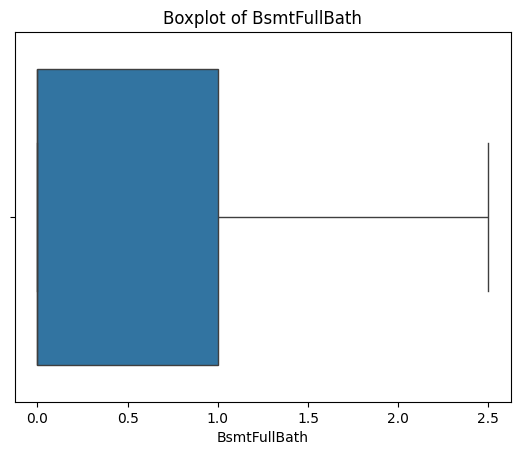

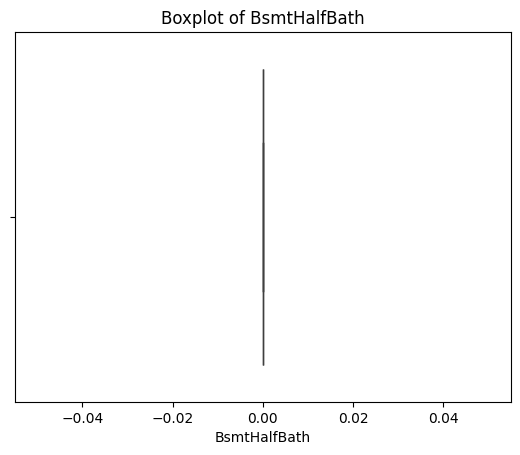

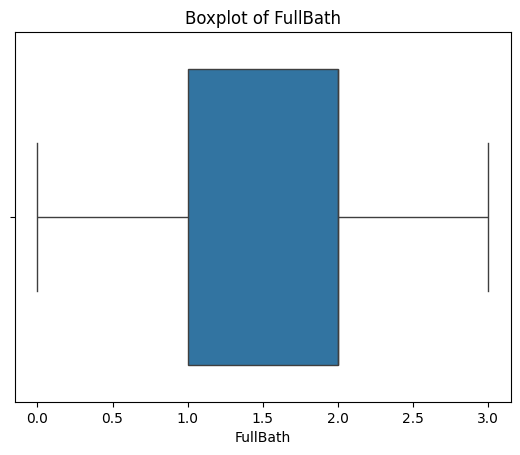

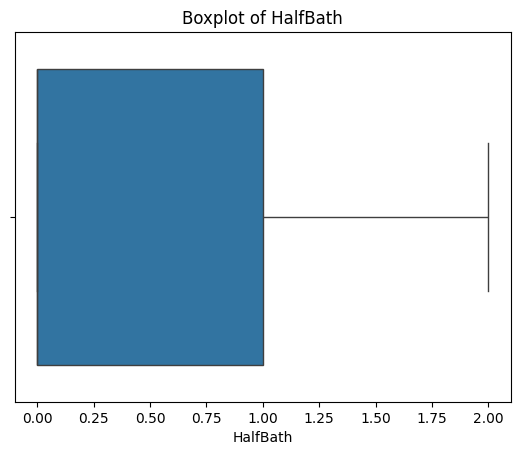

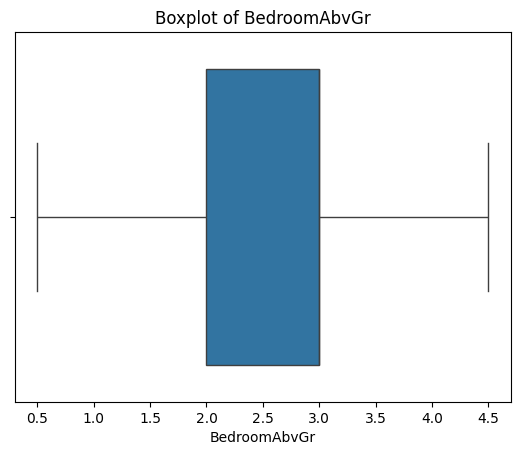

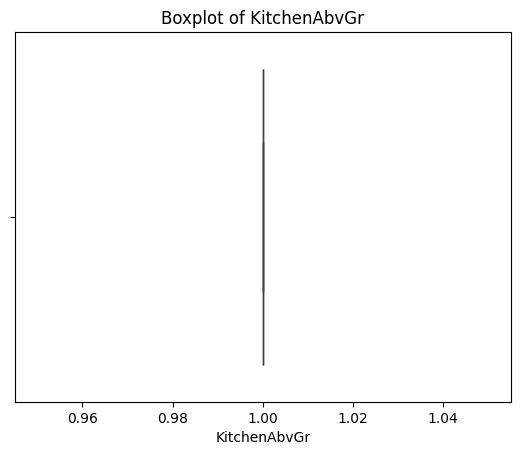

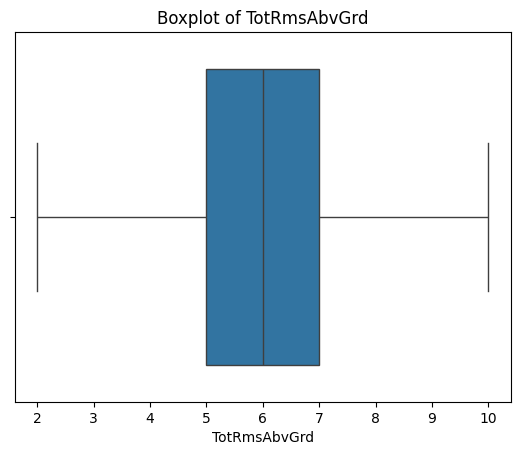

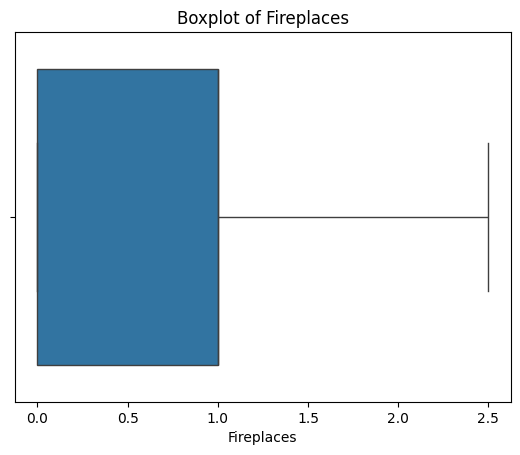

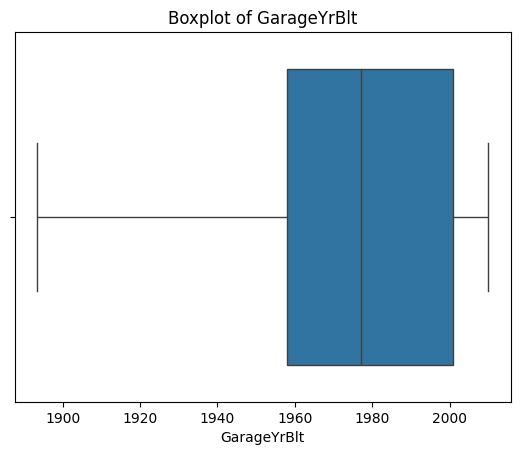

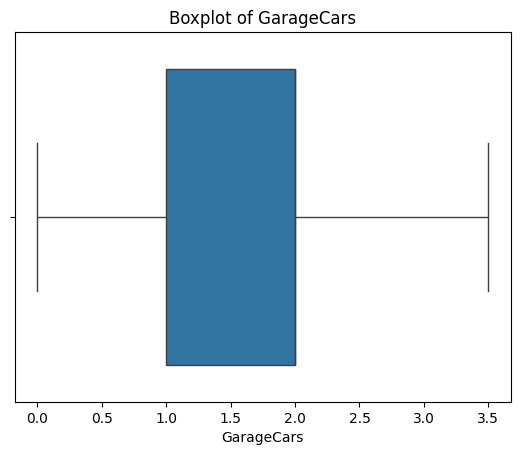

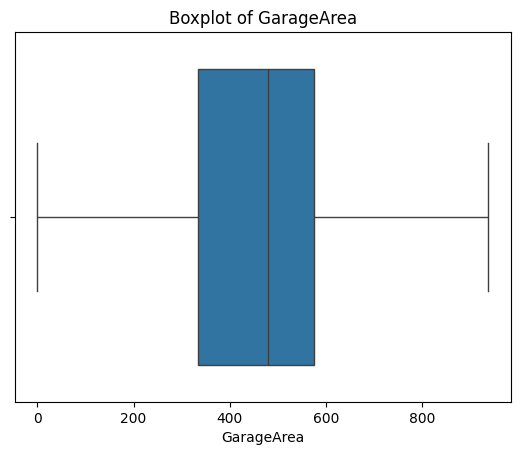

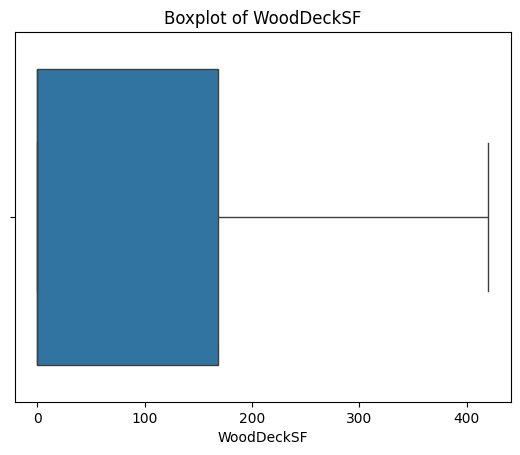

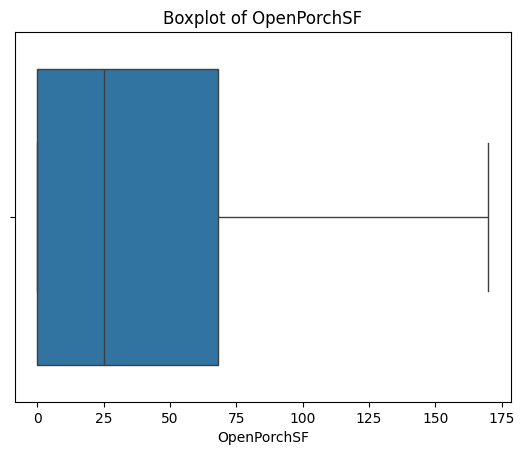

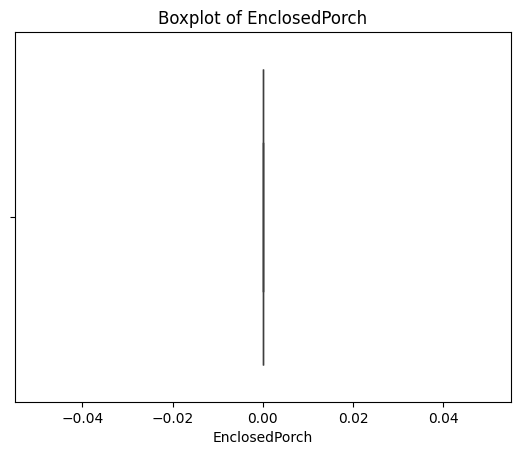

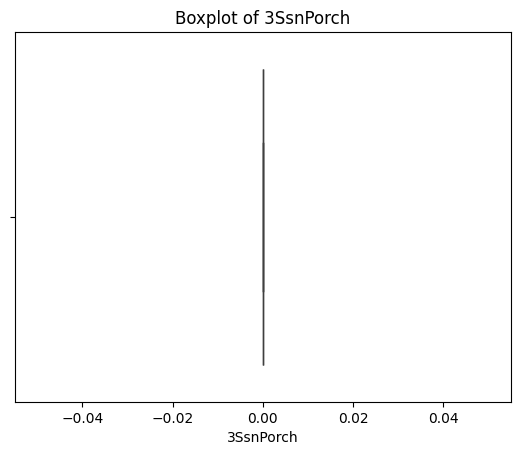

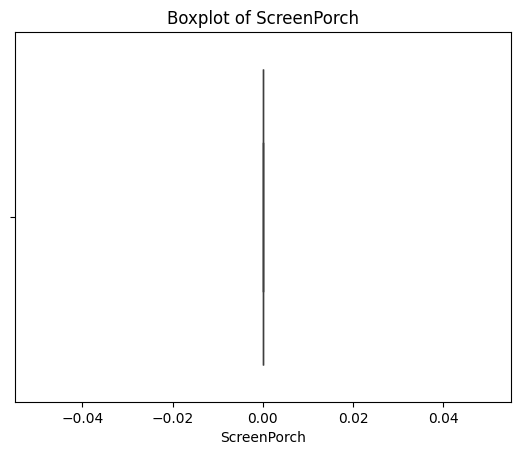

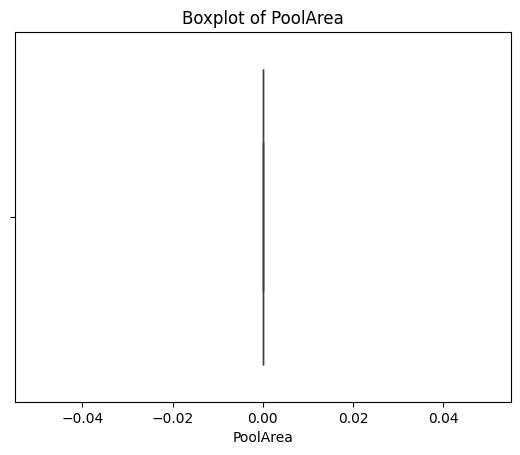

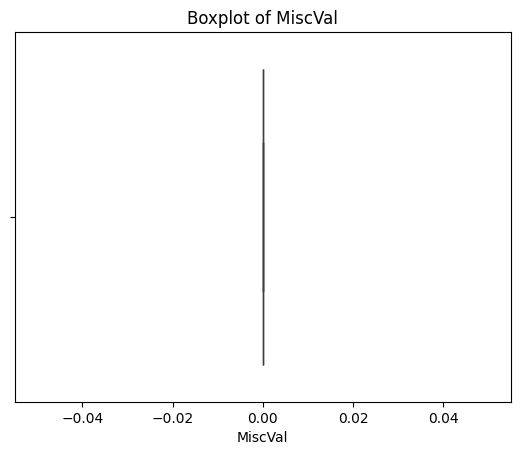

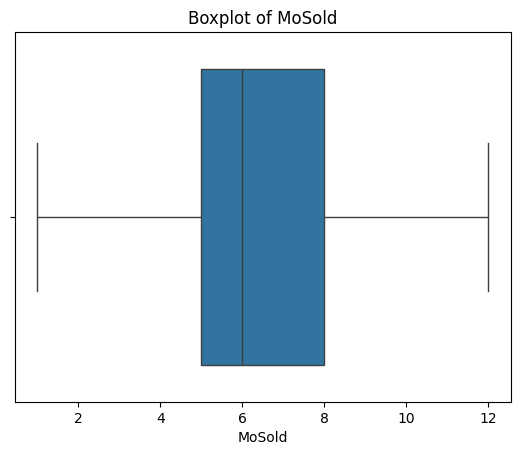

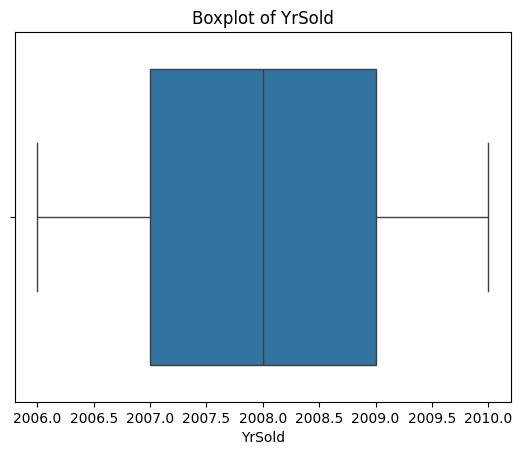

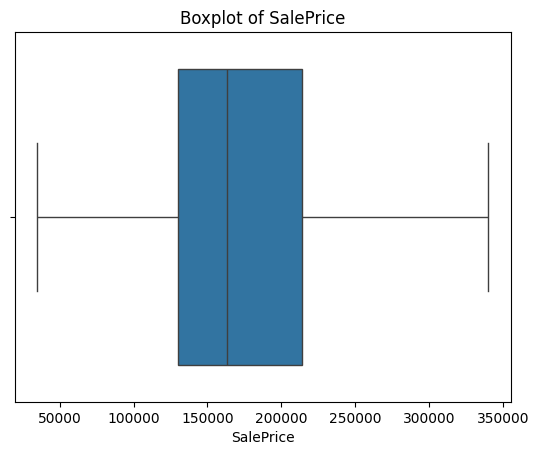

In [430]:
look_for_outliers(new_df)

In [431]:
df, categorical_cols = label_encode_categorical_features(new_df)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43


In [432]:
save_file(df, "data/preprocessed_data/encoded_data.csv")

In [433]:
df = read_file('data/preprocessed_data/encoded_data.csv')

In [434]:
numerical_features = [col for col in df if col not in categorical_cols and col != 'SalePrice' and col != 'Id']

print("Number of Numerical Features: ", len(numerical_features))
print(f"Categorical Features: {categorical_cols}")
print(f"Number of Categorical Features: {len(categorical_cols)}")
print(f"Numerical Features: {numerical_features}")

Number of Numerical Features:  36
Categorical Features: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Number of Categorical Features: 43
Numerical Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', '

In [435]:
# Apply skewness treatment only to continuous features
treated_df, skewed_features, transformation_details = treat_skewness(df, numerical_features)

Found 16 skewed continuous features: ['MSSubClass', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF']
MSSubClass transformed using Log(1 + x)
OverallCond transformed using Square Root
YearBuilt is negatively skewed. Data reflected.
YearBuilt transformed using Square Root
YearRemodAdd is negatively skewed. Data reflected.
YearRemodAdd transformed using Square Root
MasVnrArea transformed using Log(1 + x)
BsmtFinSF1 transformed using Square Root
BsmtUnfSF transformed using Square Root
1stFlrSF transformed using Square Root
2ndFlrSF transformed using Square Root
GrLivArea transformed using Square Root
BsmtFullBath transformed using Square Root
HalfBath transformed using Square Root
Fireplaces transformed using Square Root
GarageYrBlt is negatively skewed. Data reflected.
GarageYrBlt transformed using Log(1 + x)
WoodDeckSF transformed 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


----------------------------------------
Feature: MSSubClass
  Original Skewness: 1.02
  Transformed Skewness: 0.14
----------------------------------------


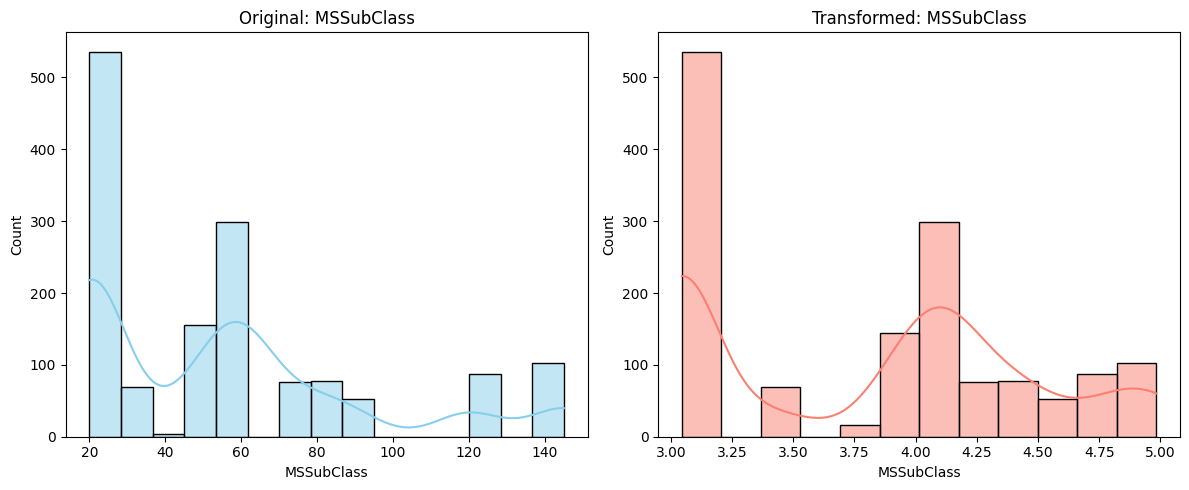

----------------------------------------
Feature: OverallCond
  Original Skewness: 0.58
  Transformed Skewness: 0.40
----------------------------------------


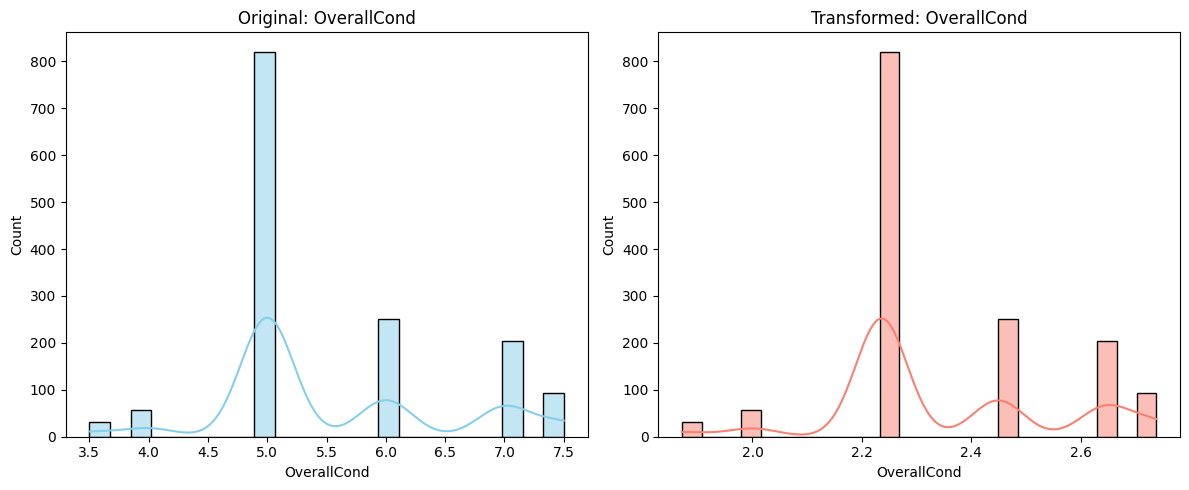

----------------------------------------
Feature: YearBuilt
  Original Skewness: -0.59
  Transformed Skewness: 0.00
----------------------------------------


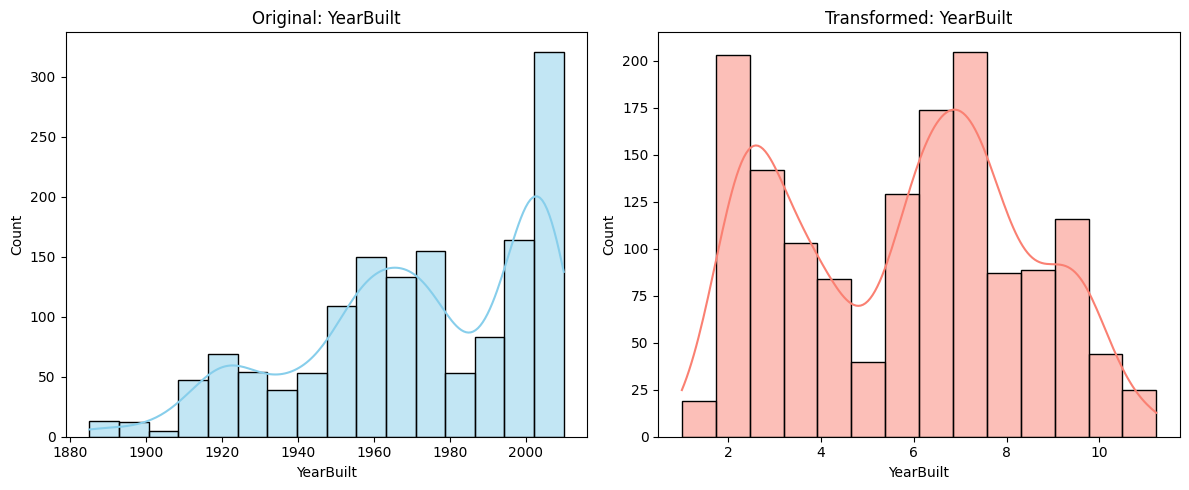

----------------------------------------
Feature: YearRemodAdd
  Original Skewness: -0.50
  Transformed Skewness: 0.18
----------------------------------------


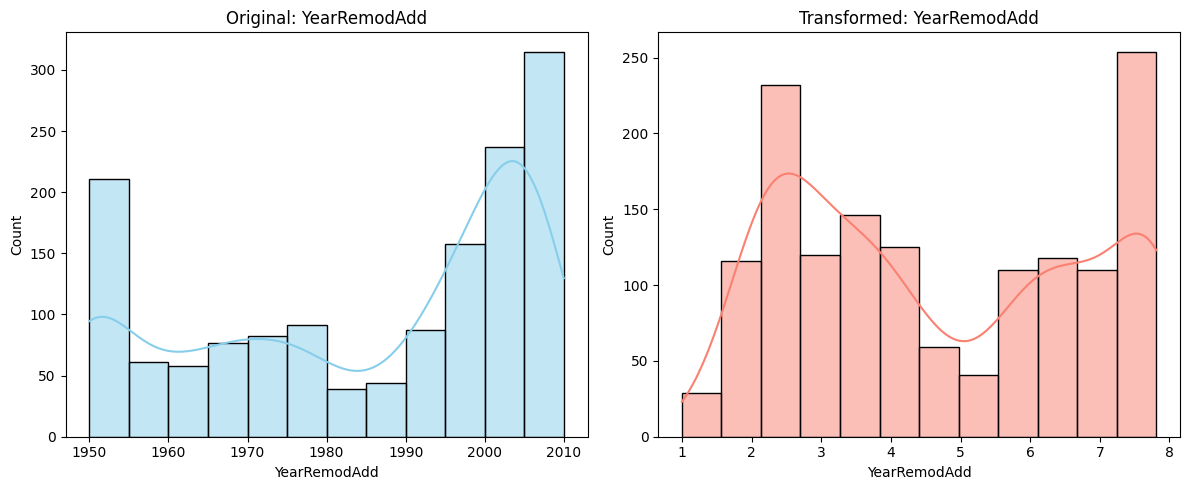

----------------------------------------
Feature: MasVnrArea
  Original Skewness: 1.29
  Transformed Skewness: 0.49
----------------------------------------


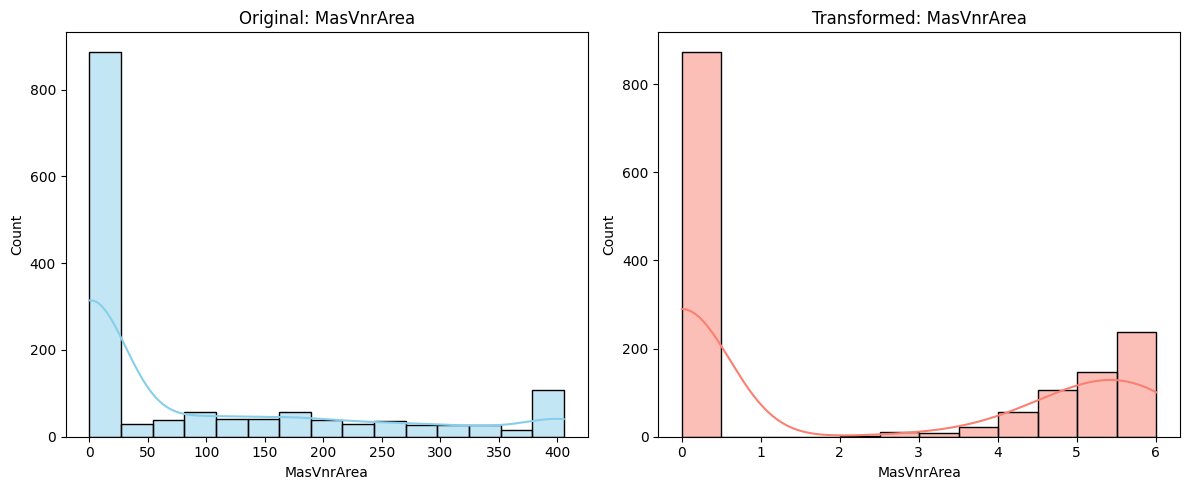

----------------------------------------
Feature: BsmtFinSF1
  Original Skewness: 0.74
  Transformed Skewness: -0.09
----------------------------------------


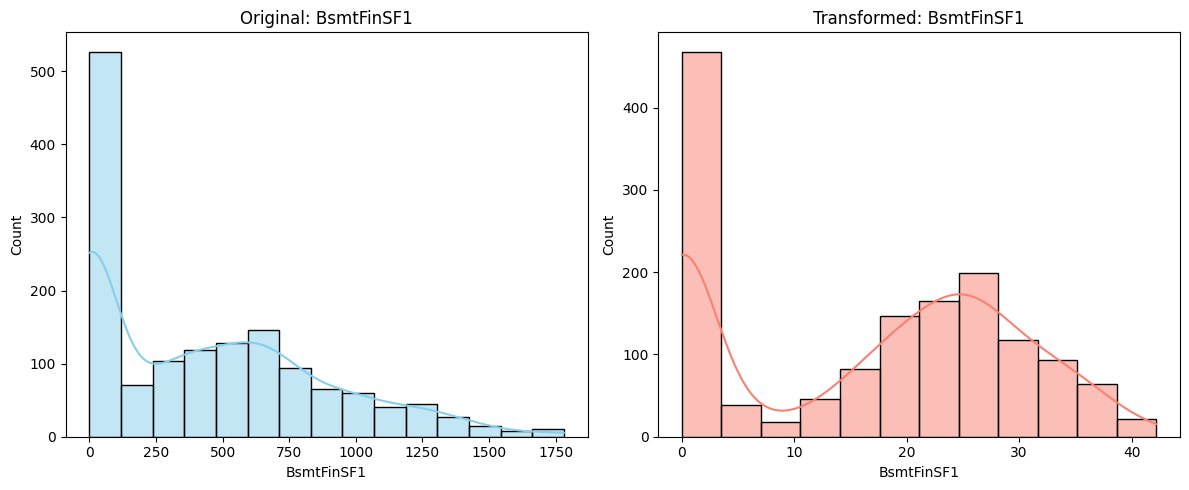

----------------------------------------
Feature: BsmtUnfSF
  Original Skewness: 0.80
  Transformed Skewness: -0.29
----------------------------------------


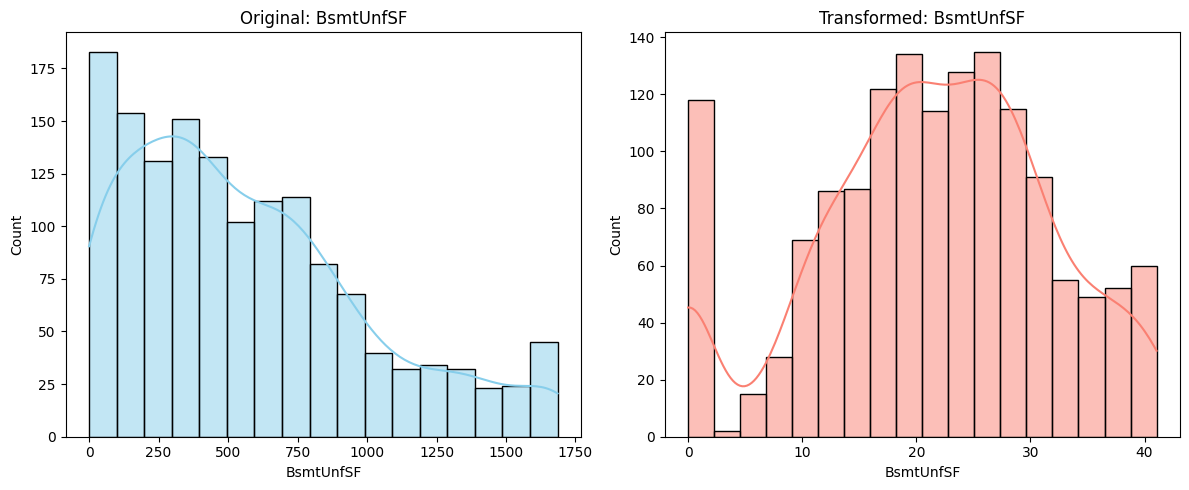

----------------------------------------
Feature: 1stFlrSF
  Original Skewness: 0.66
  Transformed Skewness: 0.32
----------------------------------------


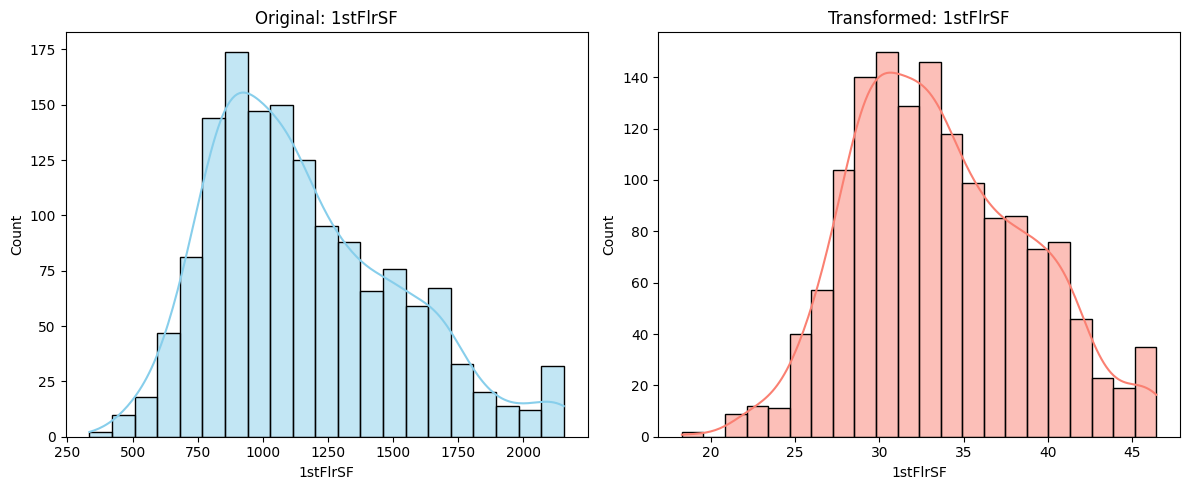

----------------------------------------
Feature: 2ndFlrSF
  Original Skewness: 0.80
  Transformed Skewness: 0.42
----------------------------------------


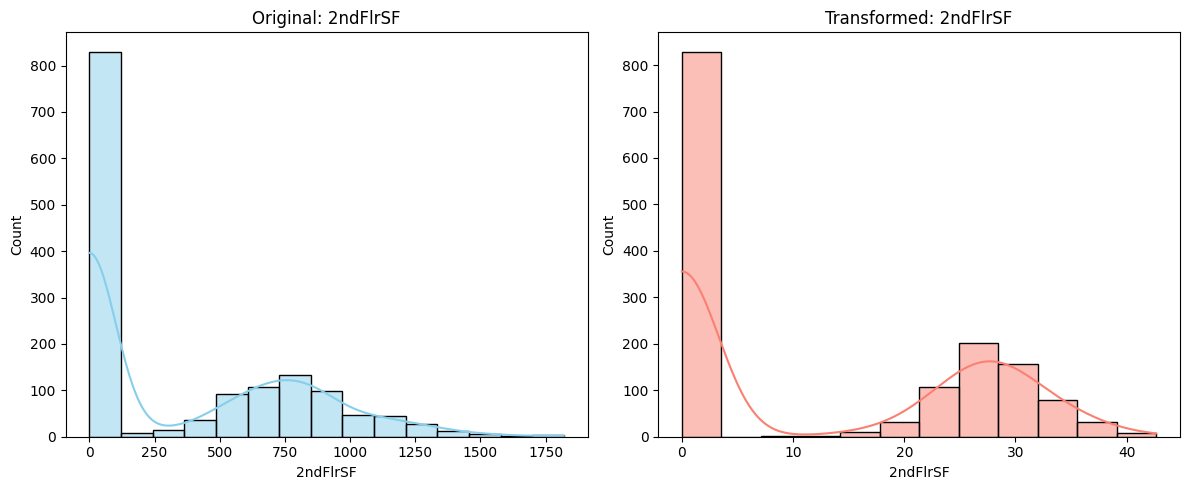

----------------------------------------
Feature: GrLivArea
  Original Skewness: 0.59
  Transformed Skewness: 0.22
----------------------------------------


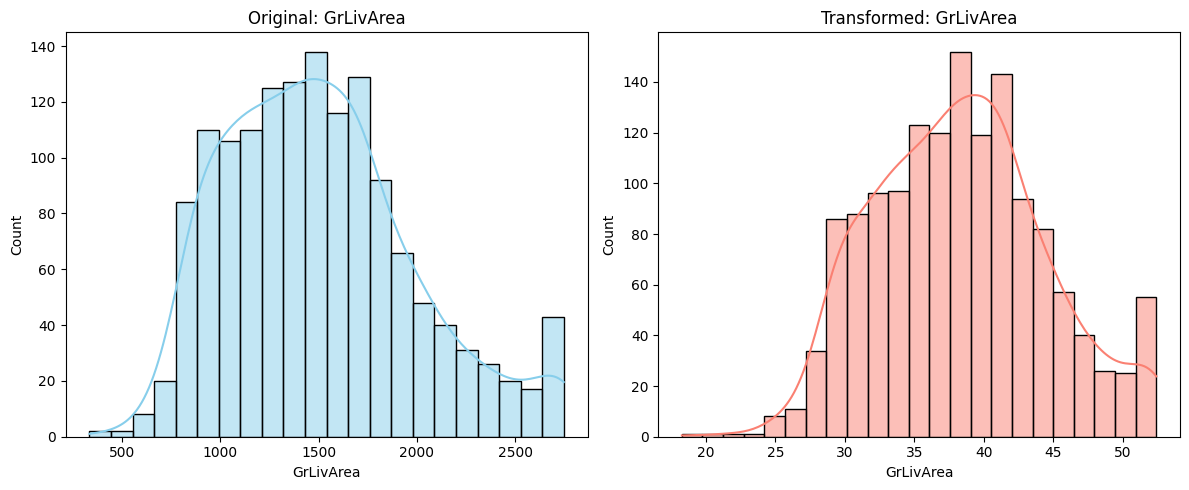

----------------------------------------
Feature: BsmtFullBath
  Original Skewness: 0.56
  Transformed Skewness: 0.38
----------------------------------------


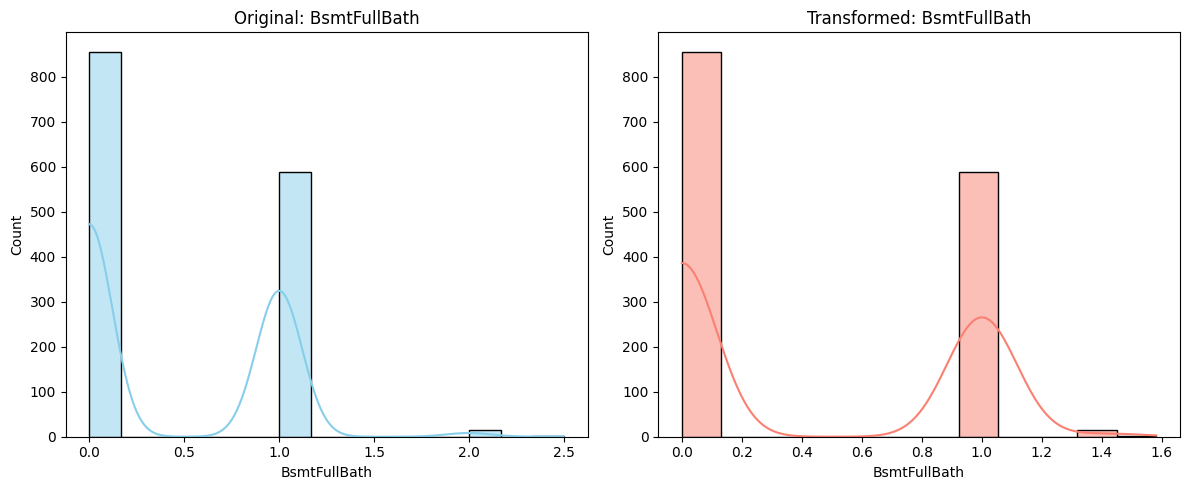

----------------------------------------
Feature: HalfBath
  Original Skewness: 0.68
  Transformed Skewness: 0.54
----------------------------------------


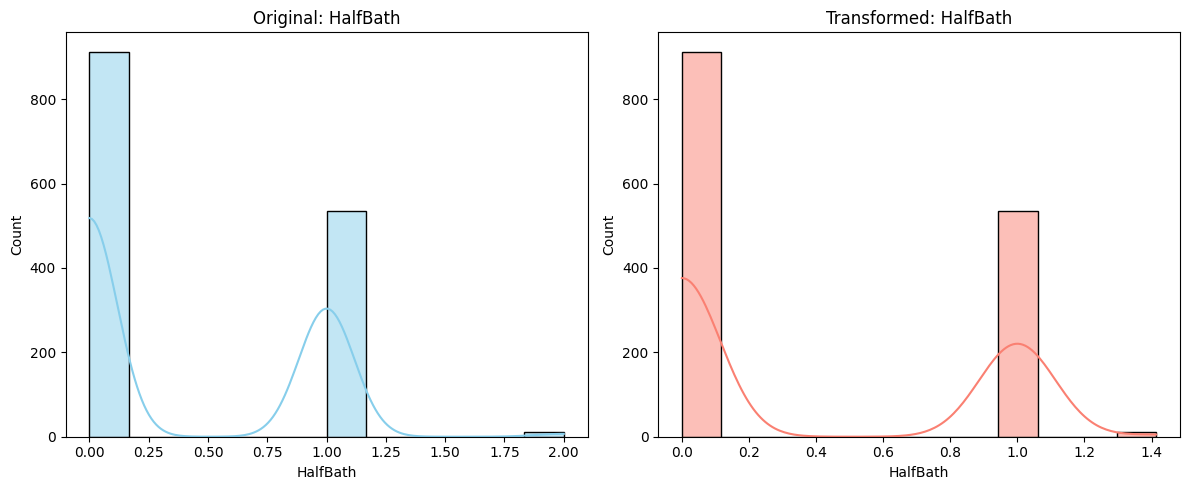

----------------------------------------
Feature: Fireplaces
  Original Skewness: 0.58
  Transformed Skewness: 0.04
----------------------------------------


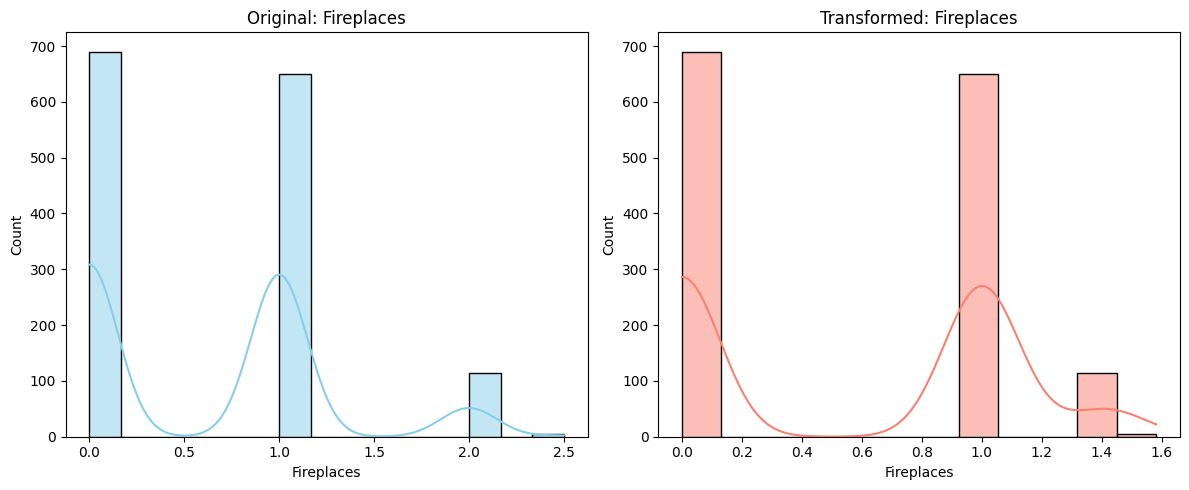

----------------------------------------
Feature: GarageYrBlt
  Original Skewness: -1.01
  Transformed Skewness: -0.38
----------------------------------------


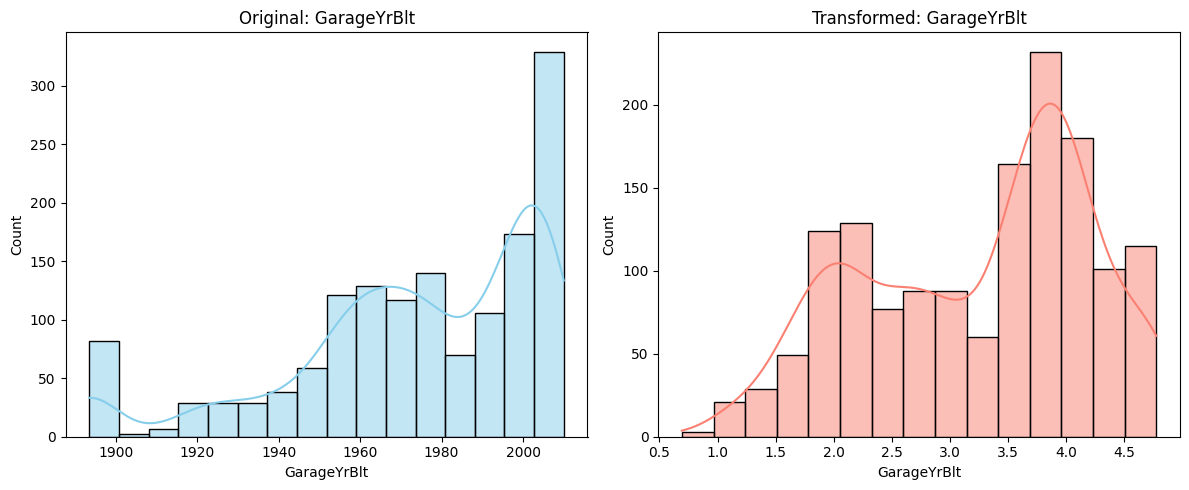

----------------------------------------
Feature: WoodDeckSF
  Original Skewness: 1.08
  Transformed Skewness: 0.15
----------------------------------------


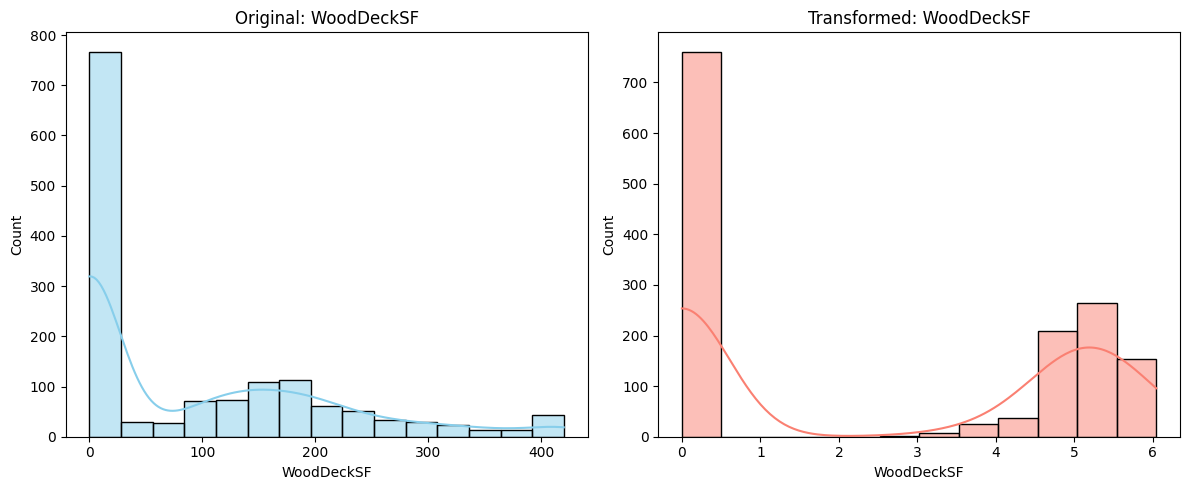

----------------------------------------
Feature: OpenPorchSF
  Original Skewness: 1.14
  Transformed Skewness: -0.05
----------------------------------------


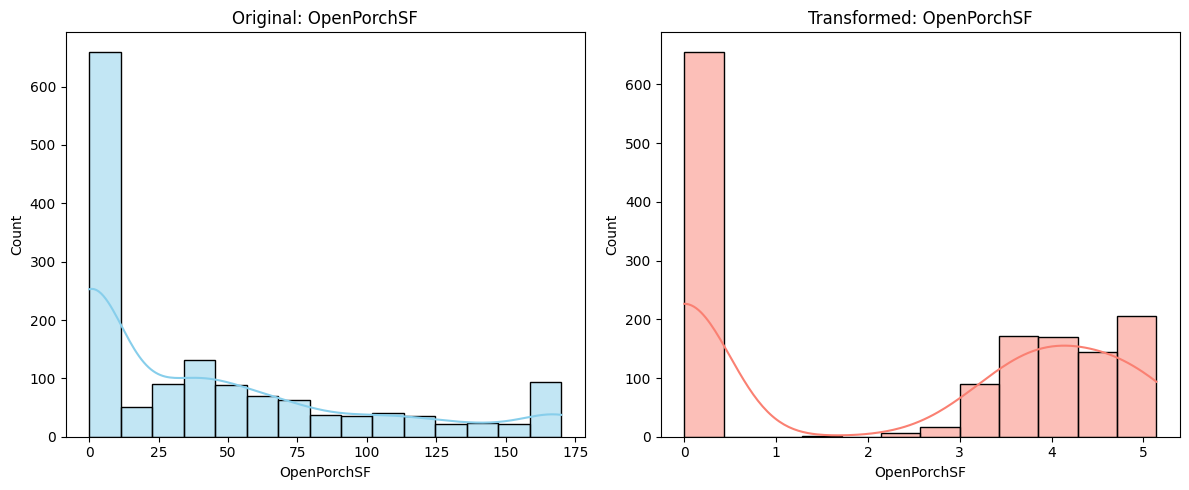

In [436]:
# Compare the original and transformed distributions for each skewed feature
for feature in skewed_features:
    original_skewness = skew(df[feature])
    transformed_skewness = skew(treated_df[feature])

    print("-" * 40)
    print(f"Feature: {feature}")
    print(f"  Original Skewness: {original_skewness:.2f}")
    print(f"  Transformed Skewness: {transformed_skewness:.2f}")
    print("-" * 40)

    # Visualize the change in distribution
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, color="skyblue")
    plt.title(f"Original: {feature}", fontsize=12)

    plt.subplot(1, 2, 2)
    sns.histplot(treated_df[feature], kde=True, color="salmon")
    plt.title(f"Transformed: {feature}", fontsize=12)

    plt.tight_layout()
    plt.show()

In [437]:
save_file(treated_df, "data/preprocessed_data/skewness_treated_data.csv")
df = read_file('data/preprocessed_data/skewness_treated_data.csv')

In [438]:
scaled_df = scale_features(df, numerical_features)

print("Before Scaling:\n", df.describe())
print("\nAfter Scaling:\n", scaled_df.describe())
save_file(scaled_df, "data/preprocessed_data/scaled_data.csv")

Before Scaling:
                 Id   MSSubClass     MSZoning  LotFrontage       LotArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    730.500000     3.807581     3.028767    69.090411   9647.388014   
std     421.610009     0.667347     0.632017    17.231909   3594.356399   
min       1.000000     3.044522     0.000000    31.500000   1481.500000   
25%     365.750000     3.044522     3.000000    60.000000   7553.500000   
50%     730.500000     3.931826     3.000000    69.000000   9478.500000   
75%    1095.250000     4.262680     3.000000    79.000000  11601.500000   
max    1460.000000     4.983607     4.000000   107.500000  17673.500000   

            Street        Alley     LotShape  LandContour    Utilities  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      0.995890     0.993836     1.942466     2.777397     0.000685  ...   
std       0.063996     0.249667     1.409156     0.707666     0.026171

Feature Engineering


In [439]:
df = read_file('data/preprocessed_data/scaled_data.csv')

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,0.454631,3,-0.237456,-0.333244,1,1,3,3,0,...,0.0,3,4,1,0.0,-1.599111,0.138777,8,4,208500.0
1,2.0,-1.143813,3,0.633321,-0.013189,1,1,3,3,0,...,0.0,3,4,1,0.0,-0.489110,-0.614439,8,4,181500.0
2,3.0,0.454631,3,-0.063300,0.446022,1,1,0,3,0,...,0.0,3,4,1,0.0,0.990891,0.138777,8,4,223500.0
3,4.0,0.682185,3,-0.527714,-0.027104,1,1,0,3,0,...,0.0,3,4,1,0.0,-1.599111,-1.367655,8,0,140000.0
4,5.0,0.454631,3,0.865528,1.283733,1,1,0,3,0,...,0.0,3,4,1,0.0,2.100892,0.138777,8,4,250000.0


In [ ]:
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [ ]:
# remove the Id column
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)
else:
    print("Column 'Id' does not exist in the DataFrame.")

# Example: Combine area-related features
df['TotalLivingArea'] = df['TotalBsmtSF'] + df['GrLivArea']
df['TotalFloorArea'] = df['1stFlrSF'] + df['2ndFlrSF']
df['TotalOutdoorArea'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

# Example: Combine age-related features
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

# Example: Combine bathroom-related features
df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']

# Example: Combine quality-related features
df['OverallScore'] = df['OverallQual'] + df['OverallCond']

# # Example: Combine garage-related features
# df['GarageSizeScore'] = df['GarageCars'] * df['GarageArea']

# Combine 1stFlrSF, 2ndFlrSF, and TotalBsmtSF to create a new feature TotalSF.
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

# Select the new features and SalePrice for correlation analysis
features_to_analyze = [
    'TotalLivingArea', 'TotalFloorArea', 'TotalOutdoorArea', 'HouseAge', 'RemodAge', 
    'TotalBathrooms', 'OverallScore', 'TotalSF', 'SalePrice'
]

# Calculate the correlation matrix
correlation_matrix = df[features_to_analyze].corr()

# Extract correlation with SalePrice
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Display the correlation table
print("Correlation with SalePrice:")
print(correlation_with_saleprice)

correlation_matrix = df[['TotalBsmtSF', 'GrLivArea', '1stFlrSF', '2ndFlrSF']].corr()
print(correlation_matrix)



# save_file(df, "data/feature_engineering/engineered_features_data.csv")

Correlation with SalePrice:
SalePrice           1.000000
TotalLivingArea     0.817564
TotalSF             0.809209
TotalFloorArea      0.726625
TotalBathrooms      0.619116
OverallScore        0.545436
TotalOutdoorArea    0.536030
HouseAge            0.414569
RemodAge            0.364269
Name: SalePrice, dtype: float64


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,TotalLivingArea,TotalFloorArea,TotalOutdoorArea,HouseAge,RemodAge,TotalBathrooms,OverallScore,TotalSF
0,0.454631,3,-0.237456,-0.333244,1,1,3,3,0,4,...,4,208500.0,0.010276,0.378630,-0.083659,1.284035,1.008947,1.289741,0.108340,-0.109691
1,-1.143813,3,0.633321,-0.013189,1,1,3,3,0,2,...,4,181500.0,0.082652,-0.484693,0.177176,-0.676166,-1.211859,0.789741,1.875098,0.047596
2,0.454631,3,-0.063300,0.446022,1,1,0,3,0,4,...,4,223500.0,0.319061,0.598125,-0.255785,1.153531,0.927397,1.289741,0.108340,0.270688
3,0.682185,3,-0.527714,-0.027104,1,1,0,3,0,0,...,0,140000.0,-0.227347,0.589550,-0.339361,-2.946836,-2.196572,-1.026041,0.108340,-0.150153
4,0.454631,3,0.865528,1.283733,1,1,0,3,0,2,...,4,250000.0,1.636705,1.480652,2.097774,1.093195,0.776902,1.289741,0.834052,1.718824


Feature Selection


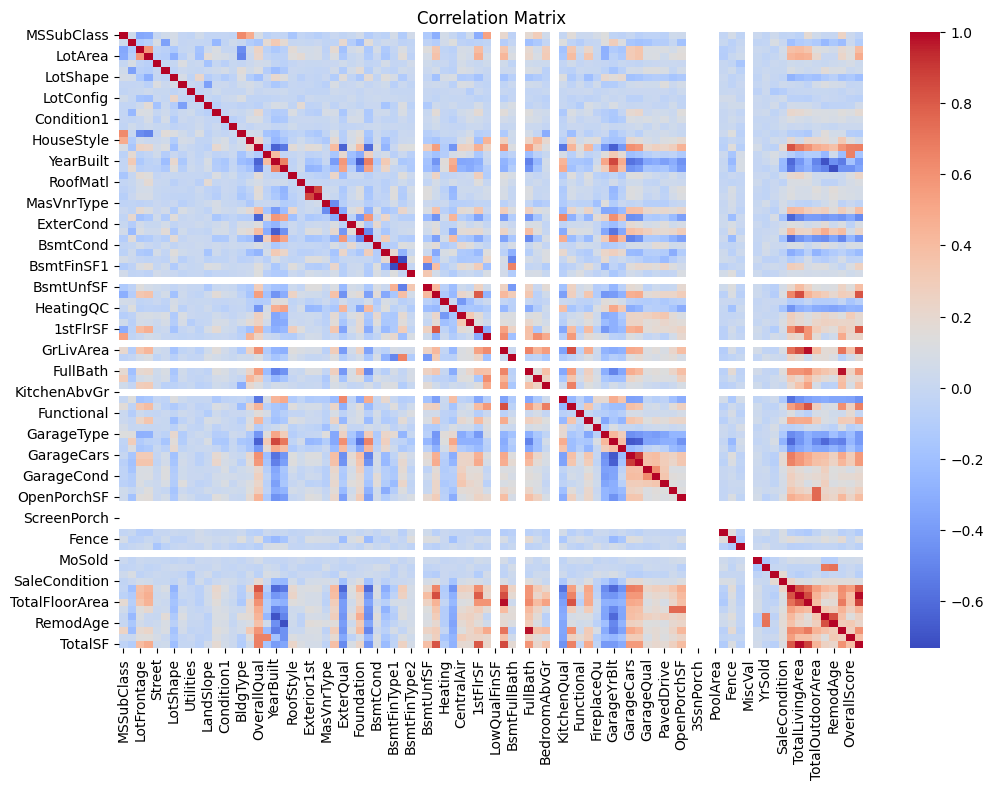

MSSubClass         -0.020681
MSZoning           -0.196852
LotFrontage         0.375850
LotArea             0.435876
Street              0.045075
Alley               0.096936
LotShape           -0.271162
LandContour         0.018962
Utilities          -0.015522
LotConfig          -0.064646
LandSlope           0.058483
Neighborhood        0.211466
Condition1          0.107908
Condition2          0.007036
BldgType           -0.081891
HouseStyle          0.196638
OverallQual         0.817680
OverallCond        -0.094345
YearBuilt          -0.613116
YearRemodAdd       -0.557473
RoofStyle           0.199857
RoofMatl            0.102450
Exterior1st         0.119490
Exterior2nd         0.123573
MasVnrType          0.001851
MasVnrArea          0.414628
ExterQual          -0.624750
ExterCond           0.132324
Foundation          0.413947
BsmtQual           -0.604843
BsmtCond            0.097588
BsmtExposure       -0.309396
BsmtFinType1       -0.103846
BsmtFinSF1          0.290728
BsmtFinType2  

In [442]:
def get_correlation_map(df):
    plt.figure(figsize=(12, 8))
    # Select only numerical features for correlation analysis
    numerical_data = df.select_dtypes(include=['number'])

    sns.heatmap(numerical_data.corr(), cmap='coolwarm', annot=False)
    plt.title("Correlation Matrix")
    plt.show()

def get_correlation_table(df):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Extract correlations with the target variable 'SalePrice'
    saleprice_correlations = correlation_matrix['SalePrice']

    # Print the table
    print(saleprice_correlations)

get_correlation_map(df)
get_correlation_table(df)

In [443]:
def feature_selection(df):
    # Define a correlation threshold (e.g., 0.3)
    correlation_threshold = 0.3

    # Select features with correlation >= threshold (absolute value)
    selected_features = saleprice_correlations[abs(saleprice_correlations) >= correlation_threshold].index.tolist()

    # Include the target variable 'SalePrice' in the selected features
    if 'SalePrice' not in selected_features:
        selected_features.append('SalePrice')

    #  Create a new DataFrame with only the selected features
    df_selected = df[selected_features]

    save_file(df_selected, "data/feature_engineering/selected_features_data.csv")
    
    # Get the list of removed features
    all_features = df.columns.tolist()
    removed_features = [feature for feature in all_features if feature not in selected_features]

    # Print the selected and removed features
    print(f"Selected Features {len(selected_features)}:")
    print(selected_features)

    print(f"\nRemoved Features {len(removed_features)}:")
    print(removed_features)


In [444]:
df = read_file('data/feature_engineering/selected_features_data.csv') 

In [445]:
# Define features (X) and target variable (y)
X = df.drop('SalePrice', axis=1)  # Features (all columns except 'SalePrice')
y = df['SalePrice']

In [446]:
# Step 1: Split the data into training (80%) and temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the temporary set into validation (50%) and test (50%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [447]:
# Print the shapes of the resulting datasets
print("Training set shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

print("\nValidation set shapes:")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")

print("\nTest set shapes:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shapes:
X_train: (1168, 26), y_train: (1168,)

Validation set shapes:
X_val: (146, 26), y_val: (146,)

Test set shapes:
X_test: (146, 26), y_test: (146,)


Linear Regression Model

In [448]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training, validation, and test sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Model Performance:")
print(f"Training R² Score: {train_r2:.4f}, MAE: {train_mae:.2f}")
print(f"Validation R² Score: {val_r2:.4f}, MAE: {val_mae:.2f}")
print(f"Test R² Score: {test_r2:.4f}, MAE: {test_mae:.2f}")


Model Performance:
Training R² Score: 0.8612, MAE: 17568.01
Validation R² Score: 0.9089, MAE: 16381.13
Test R² Score: 0.8685, MAE: 19226.84


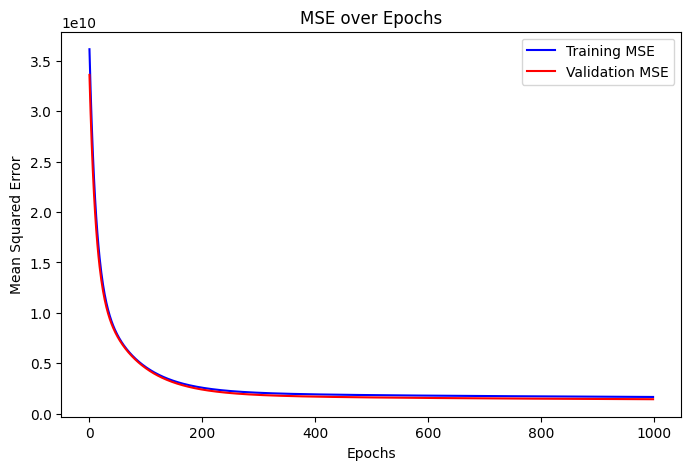

Final Training MSE: 1651489124.6914
Final Validation MSE: 1426094374.8529


In [449]:
# Initialize parameters
m, n = X_train.shape
theta = np.zeros(n)
learning_rate = 0.001
epochs = 1000

# Store MSE for each epoch
train_mse_history = []
val_mse_history = []

# Gradient Descent
for epoch in range(epochs):
    # Compute predictions
    y_train_pred = X_train.dot(theta)
    y_val_pred = X_val.dot(theta)

    # Compute loss (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_mse_history.append(train_mse)
    val_mse_history.append(val_mse)

    # Compute gradients
    gradients = (1/m) * X_train.T.dot(y_train_pred - y_train)

    # Update parameters
    theta -= learning_rate * gradients

# Plot MSE over epochs
plt.figure(figsize=(8,5))
plt.plot(range(epochs), train_mse_history, label='Training MSE', color='blue')
plt.plot(range(epochs), val_mse_history, label='Validation MSE', color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('MSE over Epochs')
plt.legend()
plt.show()

# Print final MSE values
print(f"Final Training MSE: {train_mse_history[-1]:.4f}")
print(f"Final Validation MSE: {val_mse_history[-1]:.4f}")

Polynomial Regression

In [ ]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Define polynomial features
degree = 2  # You can change the degree as needed
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_val_pred = model.predict(X_val_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Polynomial Regression Model Performance:")
print(f"Training R² Score: {train_r2:.4f}, MAE: {train_mae:.2f}")
print(f"Validation R² Score: {val_r2:.4f}, MAE: {val_mae:.2f}")
print(f"Test R² Score: {test_r2:.4f}, MAE: {test_mae:.2f}")

Polynomial Regression Model Performance:
Training R² Score: 0.8619, MAE: 17485.59
Validation R² Score: 0.9099, MAE: 16278.92
Test R² Score: 0.8690, MAE: 19033.66


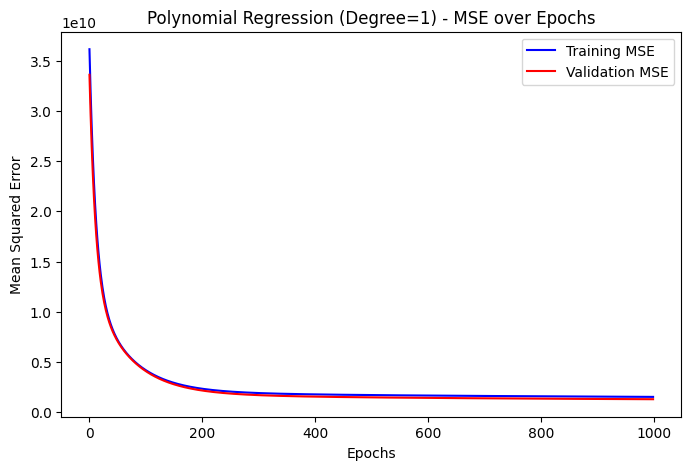

Final Training MSE: 1503256808.4490
Final Validation MSE: 1269932421.7391


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Define polynomial features
degree = 2  # Change degree as needed
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Initialize parameters
m, n = X_train_poly.shape
theta = np.zeros(n)
learning_rate = 0.001
epochs = 1000

# Store MSE for each epoch
train_mse_history = []
val_mse_history = []

# Gradient Descent
for epoch in range(epochs):
    # Compute predictions
    y_train_pred = X_train_poly.dot(theta)
    y_val_pred = X_val_poly.dot(theta)

    # Compute loss (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_mse_history.append(train_mse)
    val_mse_history.append(val_mse)

    # Compute gradients
    gradients = (1/m) * X_train_poly.T.dot(y_train_pred - y_train)

    # Update parameters
    theta -= learning_rate * gradients

# Plot MSE over epochs
plt.figure(figsize=(8,5))
plt.plot(range(epochs), train_mse_history, label='Training MSE', color='blue')
plt.plot(range(epochs), val_mse_history, label='Validation MSE', color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title(f'Polynomial Regression (Degree={degree}) - MSE over Epochs')
plt.legend()
plt.show()

# Print final MSE values
print(f"Final Training MSE: {train_mse_history[-1]:.4f}")
print(f"Final Validation MSE: {val_mse_history[-1]:.4f}")
